# **Projet 4 : Anticipez les besoins en consommation de bâtiments**

######

## **Partie 1 :** Prédiction de la variable **SiteEnergyUseWN(kBtu)**

## Après avoir effectuer une analyse exploratoire, un premier modèle prédictif(variable cible SiteEnergyUseWN(kBtu)) sera entrainer avec toutes les variables. Ensuite un second modèle sera entrainer en excluant uniquement la variable 'ENERGYSTARScore'.

#####

### **- Sommaire -**

### 1-  Chargement des données Entrée/Sortie

- Importation des données

- Visualisation de la variable 

- Choix de la variable prédictive

### 2- Prédiction de la variable "SiteEnergyUseWN(kBtu)"

#### 2.1 - Modèles linéaires

- Validation croisée << GridsearchCV >> pour optimiser les paramètres du modèle <span style="color: blue;"> Dummy Regressor</span>

- Modèle <span style="color: blue;"> Dummy Regressor</span>

-  Modèle <span style="color: blue;">  elasticNet </span>

#### 2.2 - Modèles Non-linéaires

- Modèle <span style="color: blue;"> Régression ridge à noyau</span>

- Modèle <span style="color: blue;"> RandomForest</span>

- Modèle <span style="color: blue;">Gradient boosting</span> 

- Modèle <span style="color: blue;">SVM</span> 

- Tableau récapitulatif des modèles non-linéaires

- Features des variables importantes

- visualisation des variables importantes

#### 3- Ajout des variables "ENERGYSTARScore" 

##

#

### **1-  Chargement des données Entrée/Sortie**

#### **00- Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, make_scorer
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn import kernel_ridge
from sklearn.kernel_ridge import KernelRidge

from sklearn import linear_model
from sklearn import metrics

import timeit
# import shap
%matplotlib inline

import warnings
from sklearn.exceptions import ConvergenceWarning

### **01- data loading**

In [2]:
# chemin importation des données
path_trainValTEST = r"C:/Users/521169/Documents/Openclassrooms/Projet 4/Targets/Anticipez les besoins en consommation de bâtiments/df_Energystarstore_trainVal.csv"
data_trainValTEST = pd.read_csv(path_trainValTEST)
# on supprime la variable "TotalGHGEmissions" car elle est très correlée avec la variable cible "SiteEnergyUseWN(kBtu)"
data_trainValTEST = data_trainValTEST.drop(columns= ["TotalGHGEmissions"])

data_trainValTEST.head()

,SiteEnergyUseWN(kBtu),ENERGYSTARScore,Longitude,Latitude,LargestPropertyUseTypeGFA,GFA_Building_Rate,GFA_Parking_Rate,SumUseType,Building_Age_label_encoded,NumberofFloors_label_encoded,...,PrimaryPropertyType_Small- and Mid-Sized Office,PrimaryPropertyType_Supermarket / Grocery Store,PrimaryPropertyType_University,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship Facility,BuildingType_Campus,BuildingType_NonResidential,BuildingType_Nonresidential COS,BuildingType_Nonresidential WA,BuildingType_SPS-District K-12
0,7456910.0,60.0,-122.33799,47.61220,88434.0,1.00,0.00,1,5,4,...,False,False,False,False,False,False,True,False,False,False
1,8664479.0,61.0,-122.33393,47.61317,83880.0,0.85,0.15,3,0,4,...,False,False,False,False,False,False,True,False,False,False
2,73937112.0,43.0,-122.33810,47.61393,756493.0,0.79,0.21,1,3,4,...,False,False,False,False,False,False,True,False,False,False
3,6946800.5,56.0,-122.33664,47.61412,61320.0,1.00,0.00,1,5,4,...,False,False,False,False,False,False,True,False,False,False
4,14656503.0,75.0,-122.34047,47.61375,123445.0,0.65,0.35,3,2,4,...,False,False,False,False,False,False,True,False,False,False


### Extraction  des données TEST

In [3]:
# Extraire 20% des données aléatoirement reservé au test
test_df = data_trainValTEST.sample(frac=0.2, random_state=42)  # random_state pour reproductibilité
# 80% des données restants sont reservées à l'entrainement et validation
remaining_df = data_trainValTEST.drop(test_df.index)

In [4]:
test_df.shape,remaining_df.shape

((309, 56), (1238, 56))

In [5]:
remaining_df.isnull().sum()

SiteEnergyUseWN(kBtu)                                0
ENERGYSTARScore                                    432
Longitude                                            0
Latitude                                             0
LargestPropertyUseTypeGFA                            4
GFA_Building_Rate                                    0
GFA_Parking_Rate                                     0
SumUseType                                           0
Building_Age_label_encoded                           0
NumberofFloors_label_encoded                         0
NumberofBuildings_label_encoded                      0
Neighborhood_BALLARD                                 0
Neighborhood_Ballard                                 0
Neighborhood_CENTRAL                                 0
Neighborhood_Central                                 0
Neighborhood_DELRIDGE                                0
Neighborhood_DELRIDGE NEIGHBORHOODS                  0
Neighborhood_DOWNTOWN                                0
Neighborho

In [6]:
test_df.isnull().sum()

SiteEnergyUseWN(kBtu)                                0
ENERGYSTARScore                                    119
Longitude                                            0
Latitude                                             0
LargestPropertyUseTypeGFA                            0
GFA_Building_Rate                                    0
GFA_Parking_Rate                                     0
SumUseType                                           0
Building_Age_label_encoded                           0
NumberofFloors_label_encoded                         0
NumberofBuildings_label_encoded                      0
Neighborhood_BALLARD                                 0
Neighborhood_Ballard                                 0
Neighborhood_CENTRAL                                 0
Neighborhood_Central                                 0
Neighborhood_DELRIDGE                                0
Neighborhood_DELRIDGE NEIGHBORHOODS                  0
Neighborhood_DOWNTOWN                                0
Neighborho

######

### Imputation des valeurs manquantes

### 1 cas: Données d'entrainement

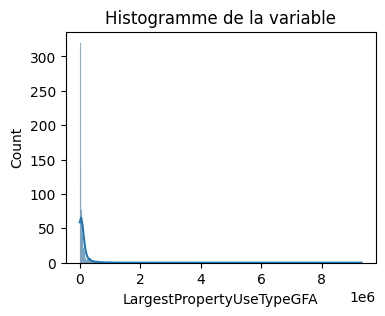

In [7]:
# Histogramme
plt.figure(figsize=(4,3))
sns.histplot(remaining_df['LargestPropertyUseTypeGFA'], kde=True)
plt.title("Histogramme de la variable")
plt.show()

### - VAriable "LargestPropertyUseTypeGFA"

In [8]:
# En observant la distribution des valeurs de la variable, la mediane sera utilisée pour l'imputation
median_Imputation = remaining_df["LargestPropertyUseTypeGFA"].median()
remaining_df["LargestPropertyUseTypeGFA"] = remaining_df["LargestPropertyUseTypeGFA"].fillna(median_Imputation)
remaining_df.isnull().sum()

SiteEnergyUseWN(kBtu)                                0
ENERGYSTARScore                                    432
Longitude                                            0
Latitude                                             0
LargestPropertyUseTypeGFA                            0
GFA_Building_Rate                                    0
GFA_Parking_Rate                                     0
SumUseType                                           0
Building_Age_label_encoded                           0
NumberofFloors_label_encoded                         0
NumberofBuildings_label_encoded                      0
Neighborhood_BALLARD                                 0
Neighborhood_Ballard                                 0
Neighborhood_CENTRAL                                 0
Neighborhood_Central                                 0
Neighborhood_DELRIDGE                                0
Neighborhood_DELRIDGE NEIGHBORHOODS                  0
Neighborhood_DOWNTOWN                                0
Neighborho

In [9]:
# Enregistrement du modèle(without ENERGYSTARScore)
# remaining_df.to_csv("C:/Users/521169/Documents/Openclassrooms/Projet 4/Targets/Anticipez les besoins en consommation de bâtiments/remaining_trainVal_without.csv", index = False)

### - Variable 'ENERGYSTARScore'

In [10]:
# En observant la distribution des valeurs de la variable, la mediane sera utilisée pour l'imputation
median_Imputation = remaining_df["ENERGYSTARScore"].median()
remaining_df["ENERGYSTARScore"] = remaining_df["ENERGYSTARScore"].fillna(median_Imputation)
remaining_df.isnull().sum()

SiteEnergyUseWN(kBtu)                              0
ENERGYSTARScore                                    0
Longitude                                          0
Latitude                                           0
LargestPropertyUseTypeGFA                          0
GFA_Building_Rate                                  0
GFA_Parking_Rate                                   0
SumUseType                                         0
Building_Age_label_encoded                         0
NumberofFloors_label_encoded                       0
NumberofBuildings_label_encoded                    0
Neighborhood_BALLARD                               0
Neighborhood_Ballard                               0
Neighborhood_CENTRAL                               0
Neighborhood_Central                               0
Neighborhood_DELRIDGE                              0
Neighborhood_DELRIDGE NEIGHBORHOODS                0
Neighborhood_DOWNTOWN                              0
Neighborhood_Delridge                         

In [11]:
# Enregistrement du modèle(with ENERGYSTARScore)
remaining_df.to_csv("C:/Users/521169/Documents/Openclassrooms/Projet 4/Targets/Anticipez les besoins en consommation de bâtiments/remaining_trainVal_with.csv", index = False)

### 2 cas: Données TEST

#### - Variable unique "ENERGYSTARScore"

In [12]:
# En observant la distribution des valeurs de la variable, la mediane sera utilisée pour l'imputation
median_Imputation = test_df["ENERGYSTARScore"].median()
test_df["ENERGYSTARScore"] = test_df["ENERGYSTARScore"].fillna(median_Imputation)
test_df.isnull().sum()

SiteEnergyUseWN(kBtu)                              0
ENERGYSTARScore                                    0
Longitude                                          0
Latitude                                           0
LargestPropertyUseTypeGFA                          0
GFA_Building_Rate                                  0
GFA_Parking_Rate                                   0
SumUseType                                         0
Building_Age_label_encoded                         0
NumberofFloors_label_encoded                       0
NumberofBuildings_label_encoded                    0
Neighborhood_BALLARD                               0
Neighborhood_Ballard                               0
Neighborhood_CENTRAL                               0
Neighborhood_Central                               0
Neighborhood_DELRIDGE                              0
Neighborhood_DELRIDGE NEIGHBORHOODS                0
Neighborhood_DOWNTOWN                              0
Neighborhood_Delridge                         

In [13]:
# Enregistrement du modèle(with ENERGYSTARScore)
test_df.to_csv("C:/Users/521169/Documents/Openclassrooms/Projet 4/Targets/Anticipez les besoins en consommation de bâtiments/test_with.csv", index = False)

In [14]:
# # Supprimer pour correlation
# test_df = test_df.drop(columns=["PrimaryPropertyType_Hospital","PrimaryPropertyType_Hospital"],axis=1)
# remaining_df = remaining_df.drop(columns=["PrimaryPropertyType_Hospital","PrimaryPropertyType_Hospital"] ,axis=1)

######

### Variables Explicatives et Expliquées
- **Données entrées/Sortie**

In [15]:
train_validation = remaining_df
# séparation de la variable à expliquer et les variables explicatives
X = train_validation[train_validation.columns[1:]] # colonnes excepter la variable à prédire
y = train_validation['SiteEnergyUseWN(kBtu)']  # variable cible à prédire
# Données de test
X_test = test_df.drop("SiteEnergyUseWN(kBtu)", axis=1)  # Variables explicatives
y_test = test_df["SiteEnergyUseWN(kBtu)"]  # Variable cible

In [16]:
# variables explicatives
X.head()

,ENERGYSTARScore,Longitude,Latitude,LargestPropertyUseTypeGFA,GFA_Building_Rate,GFA_Parking_Rate,SumUseType,Building_Age_label_encoded,NumberofFloors_label_encoded,NumberofBuildings_label_encoded,...,PrimaryPropertyType_Small- and Mid-Sized Office,PrimaryPropertyType_Supermarket / Grocery Store,PrimaryPropertyType_University,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship Facility,BuildingType_Campus,BuildingType_NonResidential,BuildingType_Nonresidential COS,BuildingType_Nonresidential WA,BuildingType_SPS-District K-12
0,60.0,-122.33799,47.61220,88434.0,1.00,0.00,1,5,4,0,...,False,False,False,False,False,False,True,False,False,False
1,61.0,-122.33393,47.61317,83880.0,0.85,0.15,3,0,4,0,...,False,False,False,False,False,False,True,False,False,False
2,43.0,-122.33810,47.61393,756493.0,0.79,0.21,1,3,4,0,...,False,False,False,False,False,False,True,False,False,False
3,56.0,-122.33664,47.61412,61320.0,1.00,0.00,1,5,4,0,...,False,False,False,False,False,False,True,False,False,False
4,75.0,-122.34047,47.61375,123445.0,0.65,0.35,3,2,4,0,...,False,False,False,False,False,False,True,False,False,False


In [17]:
# variables à expliquer ou cible
y.head()

0     7456910.0
1     8664479.0
2    73937112.0
3     6946800.5
4    14656503.0
Name: SiteEnergyUseWN(kBtu), dtype: float64

##### Visualisation de la distribution des X 

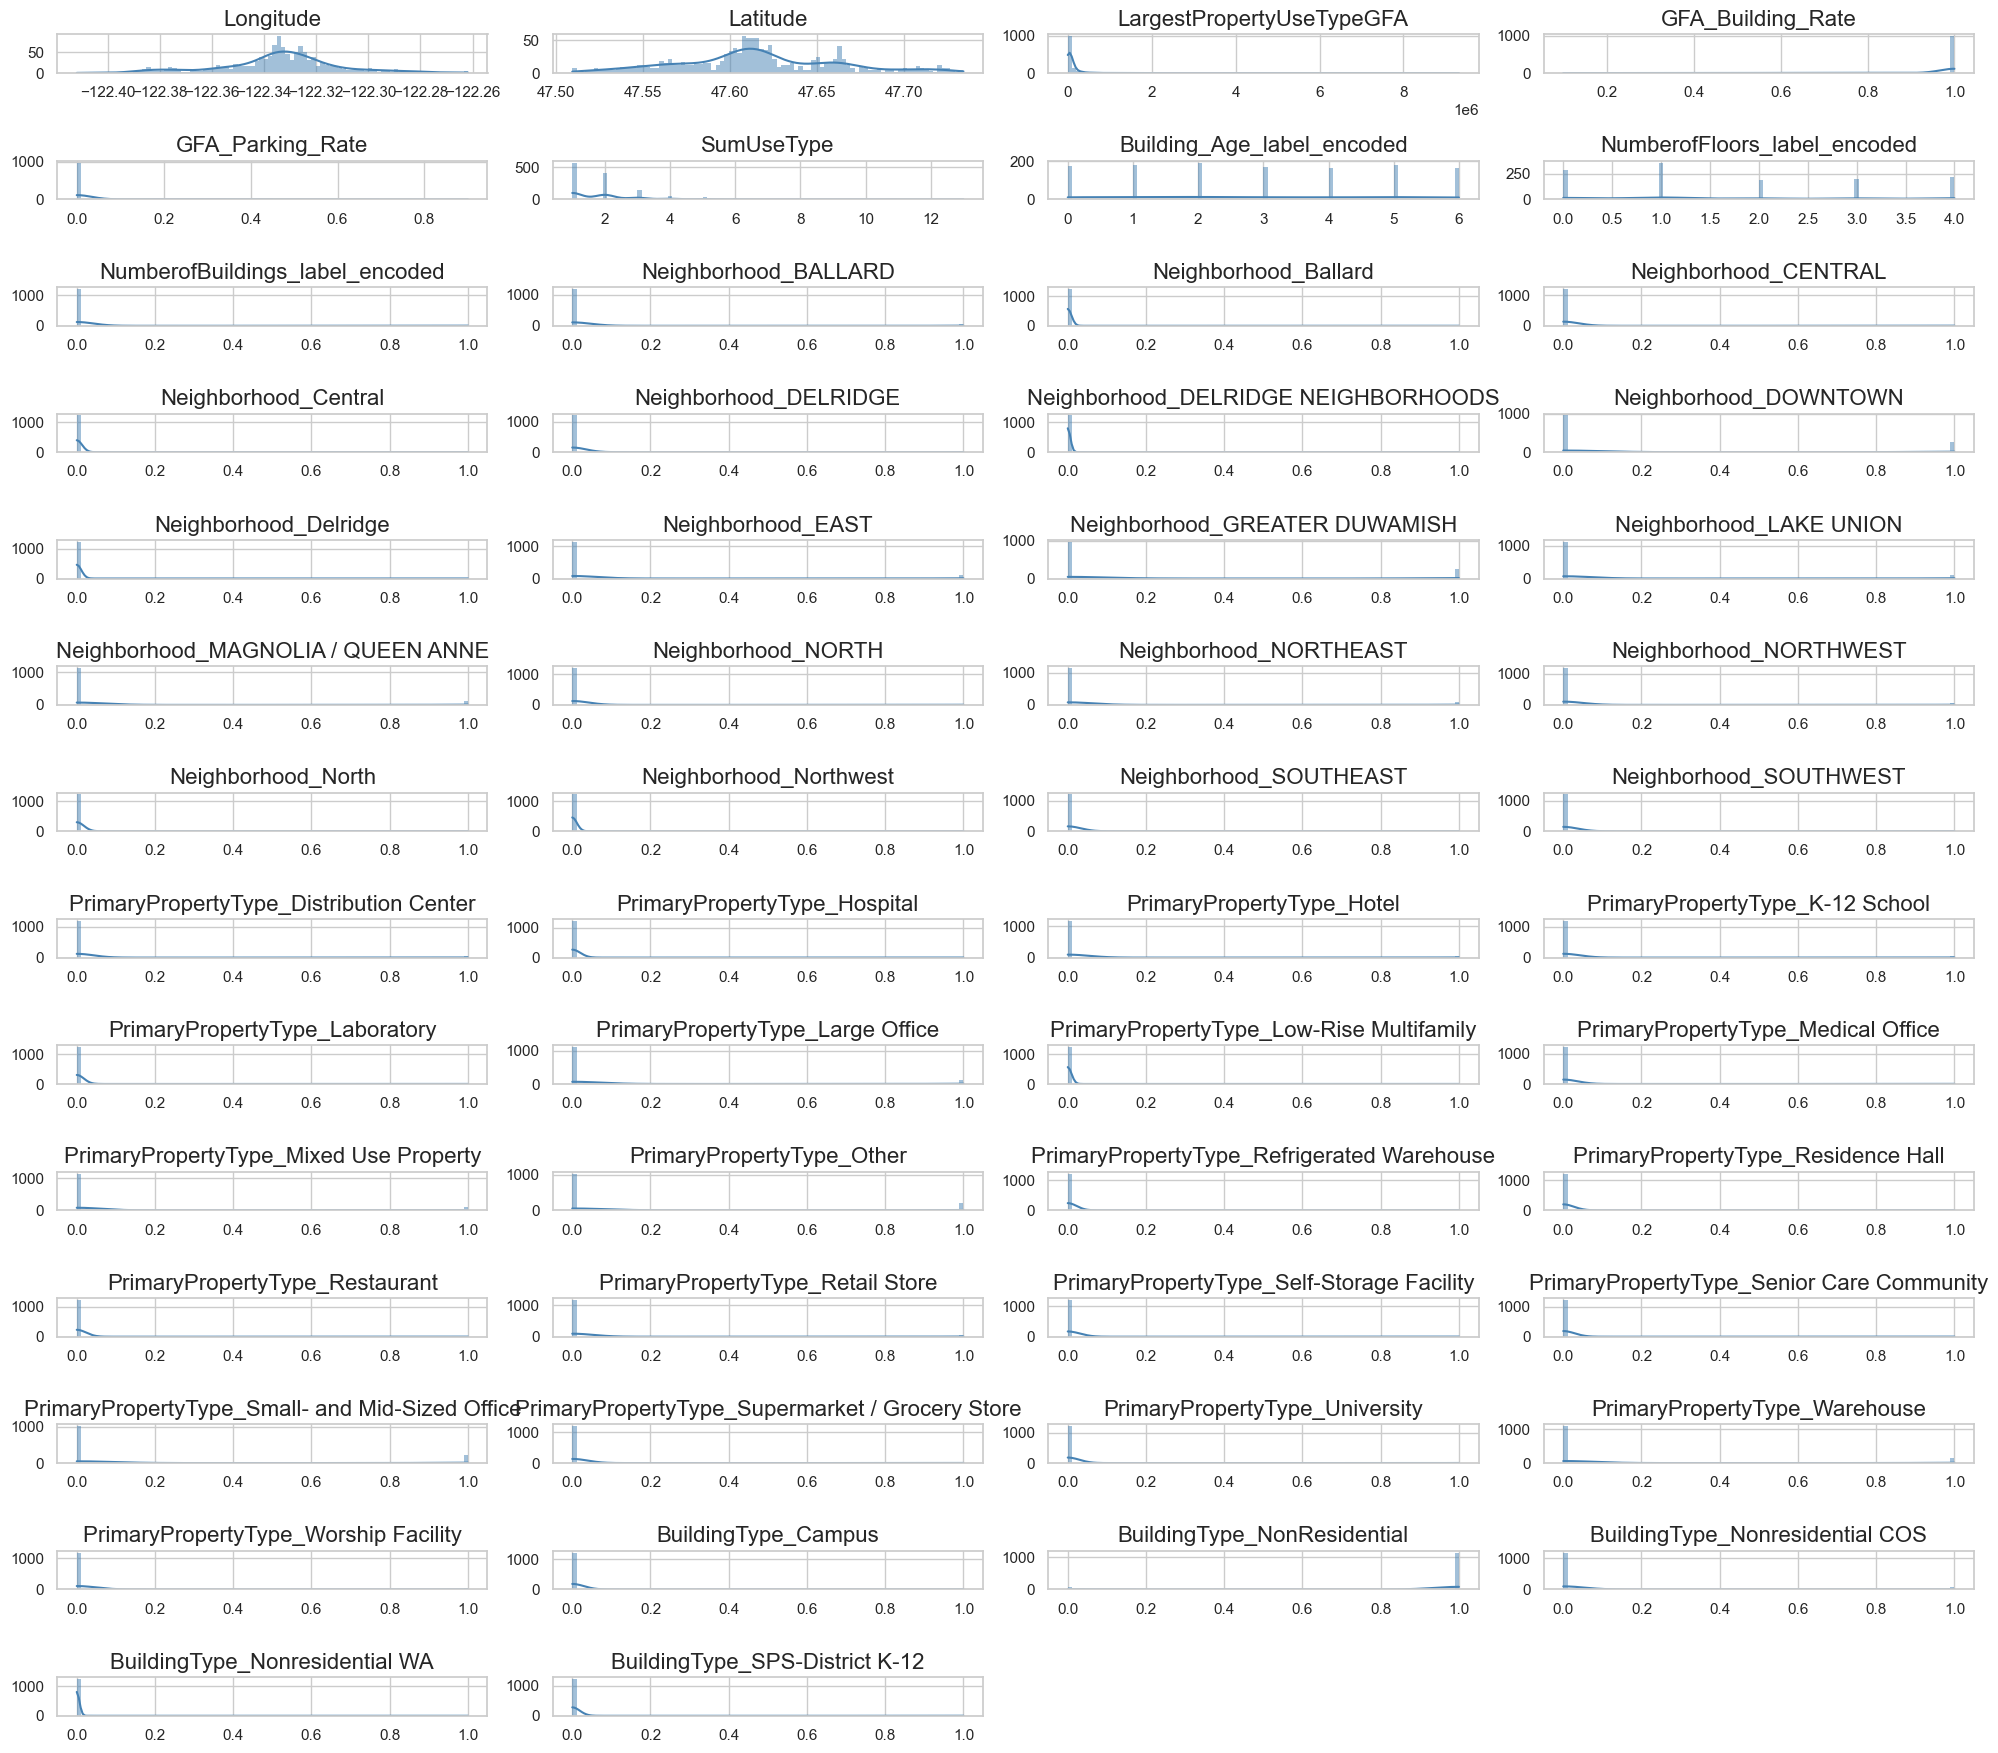

In [18]:
sns.set(style="whitegrid")
fig = plt.figure(figsize=(20, 25))

for feat_idx in range(1, X.shape[1]):  # On parcourt les colonnes à partir de la deuxième colonne
    ax = fig.add_subplot(20, 4, feat_idx)  # Disposition 18 lignes x 4 colonnes
    sns.histplot(X.iloc[:, feat_idx], bins=90, kde=True, color='steelblue', edgecolor='none', ax=ax) 
    ax.set_title(X.columns[feat_idx], fontsize=16)  # Titre du sous-graphique
    ax.set_xlabel('')  # Pas de titre sur l'axe x pour éviter les répétitions
    ax.set_ylabel('') 
plt.tight_layout()
plt.show()

 **- Distribution de la variable cible**

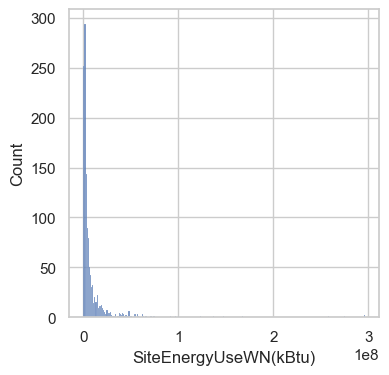

In [19]:
plt.figure(figsize=(4,4))
sns.histplot(data=train_validation, x='SiteEnergyUseWN(kBtu)')
plt.show()

 - **Normalisation des données d'entées**

In [20]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X)  # Fit et transform sur l'ensemble d'entraînement
X_test = scaler.transform(X_test)  # Transform uniquement sur test

- **Scindons les données en entrainement et validation**

In [21]:
# division des données: Entrainement et Validation
X_train, X_check, y_train, y_check = train_test_split(X_train, y, test_size = 0.3, random_state = 42)
print('train_70% set :', X_train.shape)
print('check_30% set :', X_check.shape)

train_70% set : (866, 55)
check_30% set : (372, 55)


######

# **2- Prédiction de la variable "SiteEnergyUseWN(kBtu)"**

## 1er cas: <span style="color: blue;"> Modèle Avec la variable "EnergystarStore" </span> <span style="color: blue;">  </span> 

######

## 2.1 - Modèle linéaire

### <span style="color: blue;"> **Modèle Dummy Regressor** </span> <span style="color: blue;">  </span> 

2.1.1 -  Validation croisée << GridsearchCV >> pour optimiser les paramètres du modèle Dummy Regressor

##### **- Définition des hyperparamètres paramètres à tester**

In [22]:
param_dummy = {
                'strategy': ['mean', 'median', 'quantile'], 
                'quantile': [0.25, 0.5, 0.75] 
              }
X_train_dummy = X_train
y_train_dummy = y_train
X_check_dummy = X_check
y_check_dummy = y_check
X_test_dummy = X_test
y_test_dummy = y_test

##### **- Choix du Modèle à optimiser les paramètres**

In [23]:
dummy = DummyRegressor()
start_time_dummy = timeit.default_timer()

##### **- Application de la "validation croisée" avec les paramètres définis "param_grid"**

In [24]:
Grid_search = GridSearchCV(dummy, param_grid = param_dummy, cv=5, scoring=['neg_mean_squared_error','r2','neg_mean_absolute_error'], refit='r2')
Grid_search.fit(X_train_dummy, y_train_dummy)

GridSearchCV(cv=5, estimator=DummyRegressor(),
             param_grid={'quantile': [0.25, 0.5, 0.75],
                         'strategy': ['mean', 'median', 'quantile']},
             refit='r2',
             scoring=['neg_mean_squared_error', 'r2',
                      'neg_mean_absolute_error'])

###  <span style="color: blue;"> A- **Validation_DummyRegressor** </span>

- **Appliquons une prédiction avec les meilleurs paramètres optimisés**

In [25]:
Best_param_dummy = Grid_search.best_estimator_
y_check_pred = Best_param_dummy.predict(X_check_dummy)
end_time_dummy = timeit.default_timer()
elapsed_dummy = end_time_dummy - start_time_dummy

- Calculons les Performances du modèle **( RMSE, du R2 et du MAE )** 

In [26]:
import sklearn
print(sklearn.__version__)

1.6.0


In [27]:
dummy_rmse_valid = (mean_squared_error(y_check_dummy, y_check_pred))** 0.5 # moyenne de l'erreur quadratique
dummy_r2_valid = r2_score(y_check_dummy, y_check_pred) # coefficient de dertermination: taux de variabilité entre les variable
dummy_mae_valid = mean_absolute_error(y_check_dummy, y_check_pred) # erreur moyenne absolue

- **Résultats de la performance & Représentation graphique**

RMSE : 18499237.48
R2 : -0.0
MAE : 8365819.15
time_dummy : 0.21


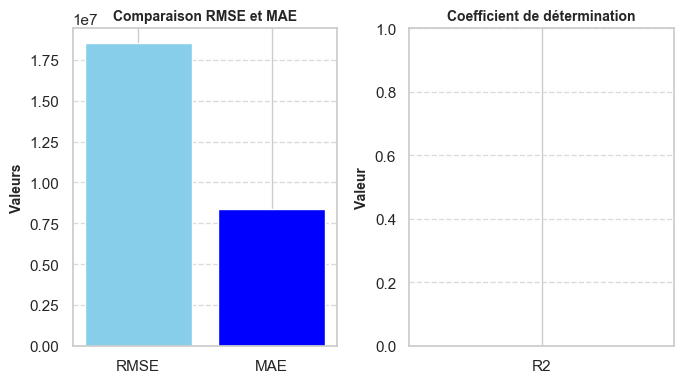

In [28]:
# Affichage des résultats
print('RMSE :', round(dummy_rmse_valid,2))
print('R2 :', round(dummy_r2_valid,2))
print('MAE :', round(dummy_mae_valid,2))
print('time_dummy :' , round(elapsed_dummy,2))

# Visualisation des paramètres RMSE, MAE, R2
fig, axes = plt.subplots(ncols=2, figsize=(7, 4))

# 1. Graphique pour RMSE et MAE
metrics = ['RMSE', 'MAE']
values = [dummy_rmse_valid, dummy_mae_valid]
axes[0].bar(metrics, values, color=['Skyblue', 'blue'])
axes[0].set_title('Comparaison RMSE et MAE', fontsize=10, fontweight = 'bold')
axes[0].set_ylabel('Valeurs', fontsize=10, fontweight = 'bold')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# 2. Graphique pour R2
axes[1].bar(['R2'], [dummy_r2_valid], color='green') # coefficient de détermination commpris entre 0 et 1
axes[1].set_title('Coefficient de détermination', fontsize=10, fontweight = 'bold')
axes[1].set_ylabel('Valeur', fontsize=10, fontweight = 'bold')
axes[1].set_ylim(0, 1)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

- **Performance du modèle**

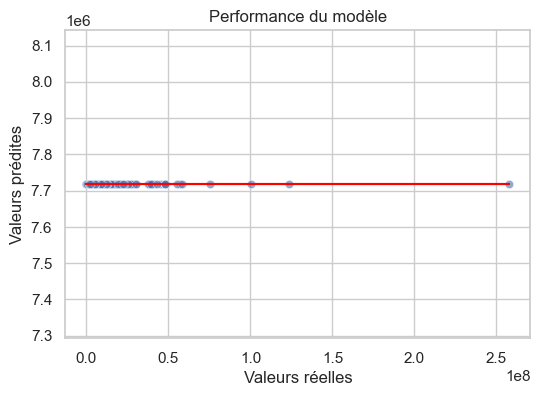

In [29]:
# Créer un graphique de nuage de points
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_check_dummy, y=y_check_pred, alpha=0.6)
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.title('Performance du modèle')

# Calculer et tracer la droite de régression
m, b = np.polyfit(y_check_dummy, y_check_pred, 1)
plt.plot(y_check_dummy, m*y_check_dummy + b, color='red')  # droite de régression

plt.show()

- **Représentation des Résidus**

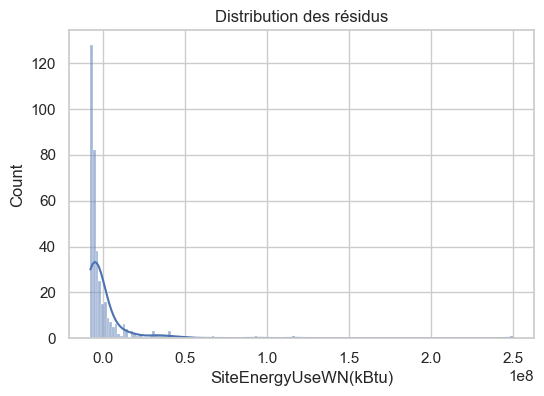

In [30]:
residus = y_check_dummy - y_check_pred
plt.figure(figsize=(6,4))
sns.histplot(residus, kde=True)
plt.title("Distribution des résidus")
plt.show()

### <span style="color: blue;"> B- **TEST_DummyRegressor** </span>

- **Appliquons une prédiction avec les meilleurs paramètres optimisés**

In [31]:
Best_param_dummy = Grid_search.best_estimator_
y_test_pred = Best_param_dummy.predict(X_test_dummy)

- Calculons les Performances du modèle **( RMSE, du R2 et du MAE )** 

In [32]:
dummy_rmse_test = (mean_squared_error(y_test_dummy, y_test_pred))**0.5 # moyenne de l'erreur quadratique
dummy_r2_test = r2_score(y_test_dummy, y_test_pred) # coefficient de dertermination: taux de variabilité entre les variable
dummy_mae_test = mean_absolute_error(y_test_dummy, y_test_pred) # erreur moyenne absolue

- **Résultats de la performance & Représentation graphique**

RMSE : 28922305.52
R2 : -0.0
MAE : 8593492.51


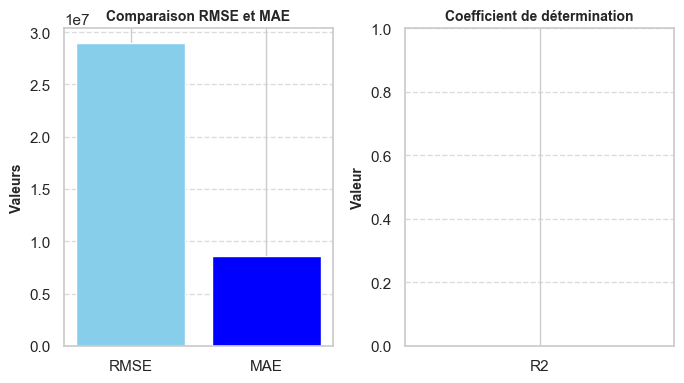

In [33]:
# Affichage des résultats
print('RMSE :', round(dummy_rmse_test,2))
print('R2 :', round(dummy_r2_test,2))
print('MAE :', round(dummy_mae_test,2))

# Visualisation des paramètres RMSE, MAE, R2
fig, axes = plt.subplots(ncols=2, figsize=(7, 4))

# 1. Graphique pour RMSE et MAE
metrics = ['RMSE', 'MAE']
values = [dummy_rmse_test, dummy_mae_test]
axes[0].bar(metrics, values, color=['Skyblue', 'blue'])
axes[0].set_title('Comparaison RMSE et MAE', fontsize=10, fontweight = 'bold')
axes[0].set_ylabel('Valeurs', fontsize=10, fontweight = 'bold')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# 2. Graphique pour R2
axes[1].bar(['R2'], [dummy_r2_test], color='green') # coefficient de détermination commpris entre 0 et 1
axes[1].set_title('Coefficient de détermination', fontsize=10, fontweight = 'bold')
axes[1].set_ylabel('Valeur', fontsize=10, fontweight = 'bold')
axes[1].set_ylim(0, 1)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

- **Performance du modèle**

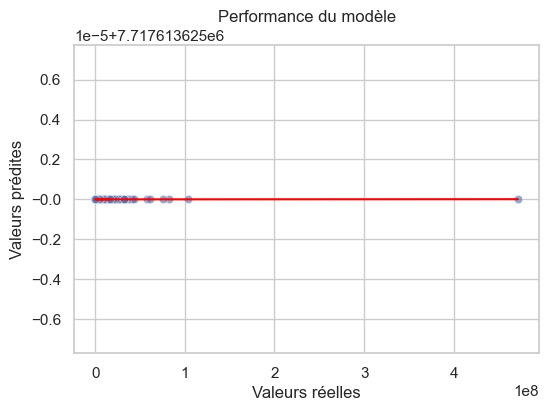

In [34]:
# Créer un graphique de nuage de points
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test_dummy, y=y_test_pred, alpha=0.6)
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.title('Performance du modèle')

# Calculer et tracer la droite de régression
m, b = np.polyfit(y_test_dummy, y_test_pred, 1)
plt.plot(y_test_dummy, m*y_test_dummy + b, color='red')  # droite de régression

plt.show()

- **Représentation des Résidus**

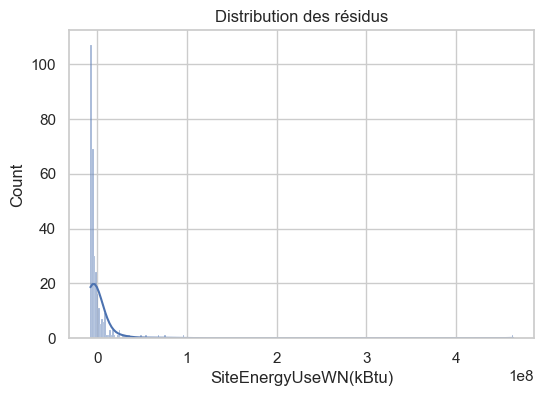

In [35]:
residus = y_test_dummy - y_test_pred
plt.figure(figsize=(6,4))
sns.histplot(residus, kde=True)
plt.title("Distribution des résidus")
plt.show()

######

## <span style="color: blue;"> **Modèle ElasticNet** </span> 


- En utilisant la "**validation croisée**" et la méthode "**GridsearchCV**"

#### - Paramètre à tester **(Ridge & Lasso)**

In [36]:
# Définir la grille de paramètres à tester
param_elasticNet = {
                    'alpha': [0.1, 1 ,10],
                    'l1_ratio': [0.5] 
                   }                             

X_train_elasticNet = X_train
y_train_elasticNet = y_train
X_check_elasticNet = X_check
y_check_elasticNet = y_check
X_test_elasticNet = X_test
y_test_elasticNet = y_test

#### **- Configuration de la méthode GridSearchCV**

In [37]:
# Définir le modèle ElasticNet
elastic_net = ElasticNet()
# Configurer GridSearchCV
Grid_search = GridSearchCV(estimator=elastic_net, param_grid = param_elasticNet, cv = 42, scoring='neg_mean_squared_error')
start_time_elasticNet = timeit.default_timer()
# Exécuter GridSearchCV
Grid_search.fit(X_train_elasticNet, y_train_elasticNet)

GridSearchCV(cv=42, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 10], 'l1_ratio': [0.5]},
             scoring='neg_mean_squared_error')

###  <span style="color: blue;"> A- **VALIDATION_ElasticNet** </span>

- **Prédiction** 

In [38]:
elapsed_elasticNet = timeit.default_timer() - start_time_elasticNet
# Prédiction sur l'ensemble de test
y_check_pred_elasticNet = Grid_search.predict(X_check_elasticNet)

- Performance du Modèle **(RMSE,R2,MAE)**

In [39]:
# Calcul de la RMSE sur l'ensemble de test
elasticNet_rmse_valid = (mean_squared_error(y_check_elasticNet, y_check_pred_elasticNet))** 0.5
elasticNet_r2_valid = r2_score(y_check_elasticNet, y_check_pred_elasticNet)
elasticNet_mae_valid = mean_absolute_error(y_check_elasticNet, y_check_pred_elasticNet)

- **Résultats & Représentation graphique**

Meilleurs paramètres : {'alpha': 1, 'l1_ratio': 0.5}
RMSE : 12730623.72
R2 : 0.53
MAE : 5983183.21
time_elasticNet: 1.05


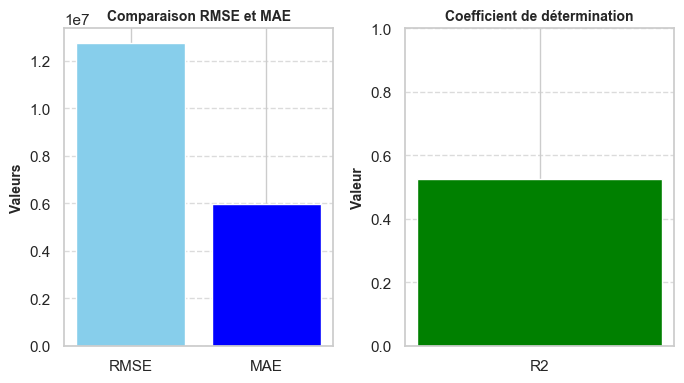

In [40]:
# Affichage des résultats
print('Meilleurs paramètres :', Grid_search.best_params_)
print('RMSE :', round(elasticNet_rmse_valid,2))
print('R2 :', round(elasticNet_r2_valid,2))
print('MAE :', round(elasticNet_mae_valid,2))
print("time_elasticNet:", round(elapsed_elasticNet,2))

# Visualisation des paramètres RMSE, MAE, R2
fig, axes = plt.subplots(ncols=2, figsize=(7, 4))

# 1. Graphique pour RMSE et MAE
metrics = ['RMSE', 'MAE']
values = [elasticNet_rmse_valid, elasticNet_mae_valid]
axes[0].bar(metrics, values, color=['Skyblue', 'blue'])
axes[0].set_title('Comparaison RMSE et MAE', fontsize=10, fontweight = 'bold')
axes[0].set_ylabel('Valeurs', fontsize=10, fontweight = 'bold')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# 2. Graphique pour R2
axes[1].bar(['R2'], [elasticNet_r2_valid], color='green') # coefficient de détermination commpris entre 0 et 1
axes[1].set_title('Coefficient de détermination', fontsize=10, fontweight = 'bold')
axes[1].set_ylabel('Valeur', fontsize=10, fontweight = 'bold')
axes[1].set_ylim(0, 1)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

- **Droite de regression**

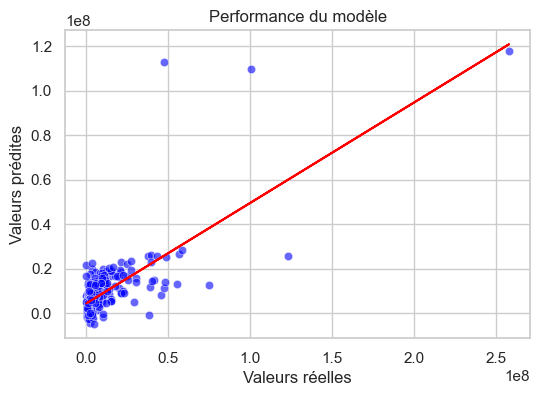

In [41]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_check_elasticNet, y=y_check_pred_elasticNet, alpha=0.6, color='blue')
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.title('Performance du modèle')

# Calculer et tracer la droite de régression
m, b = np.polyfit(y_check_elasticNet, y_check_pred_elasticNet, 1)
plt.plot(y_check_elasticNet, m*y_check_elasticNet + b, color='red')  # droite de régression
plt.show()

- **Résidus**

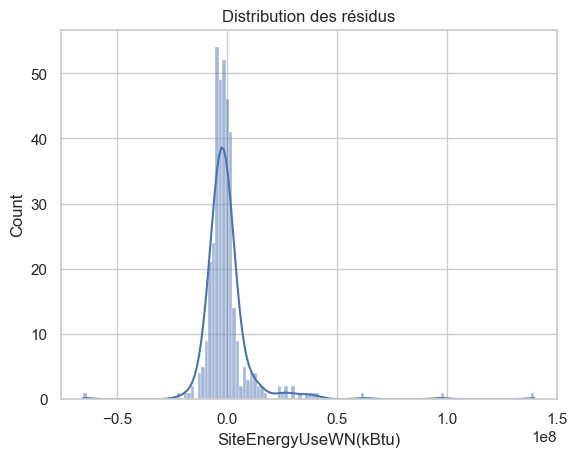

In [42]:
residus = y_check_elasticNet - y_check_pred_elasticNet
sns.histplot(residus, kde=True)
plt.title("Distribution des résidus")
plt.show()

### <span style="color: blue;"> B- **TEST_ElasticNet** </span>

- **Prédiction** 

In [43]:
# Prédiction sur l'ensemble de test
y_pred_elasticNet = Grid_search.predict(X_test_elasticNet)

- Performance du Modèle **(RMSE,R2,MAE)**

In [44]:
# Calcul de la RMSE sur l'ensemble de test
elasticNet_rmse_test = (mean_squared_error(y_test_elasticNet, y_pred_elasticNet))** 0.5
elasticNet_r2_test = r2_score(y_test_elasticNet, y_pred_elasticNet)
elasticNet_mae_test = mean_absolute_error(y_test_elasticNet, y_pred_elasticNet)

- **Résultats & Représentation graphique**

Meilleurs paramètres : {'alpha': 1, 'l1_ratio': 0.5}
RMSE : 27478329.71
R2 : 0.1
MAE : 7113251.87


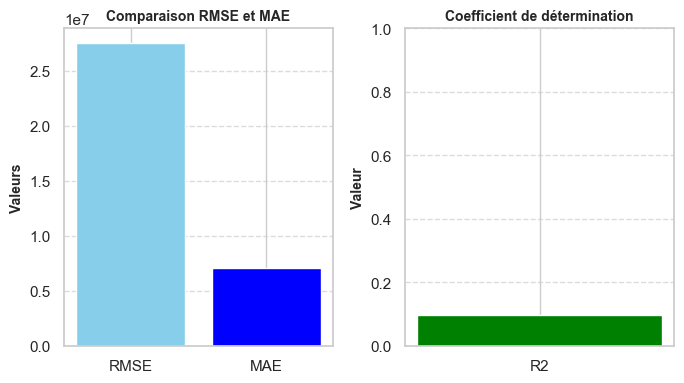

In [45]:
# Affichage des résultats
print('Meilleurs paramètres :', Grid_search.best_params_)
print('RMSE :', round(elasticNet_rmse_test,2))
print('R2 :', round(elasticNet_r2_test,2))
print('MAE :', round(elasticNet_mae_test,2))

# Visualisation des paramètres RMSE, MAE, R2
fig, axes = plt.subplots(ncols=2, figsize=(7, 4))

# 1. Graphique pour RMSE et MAE
metrics = ['RMSE', 'MAE']
values = [elasticNet_rmse_test, elasticNet_mae_test]
axes[0].bar(metrics, values, color=['Skyblue', 'blue'])
axes[0].set_title('Comparaison RMSE et MAE', fontsize=10, fontweight = 'bold')
axes[0].set_ylabel('Valeurs', fontsize=10, fontweight = 'bold')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# 2. Graphique pour R2
axes[1].bar(['R2'], [elasticNet_r2_test], color='green') # coefficient de détermination commpris entre 0 et 1
axes[1].set_title('Coefficient de détermination', fontsize=10, fontweight = 'bold')
axes[1].set_ylabel('Valeur', fontsize=10, fontweight = 'bold')
axes[1].set_ylim(0, 1)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

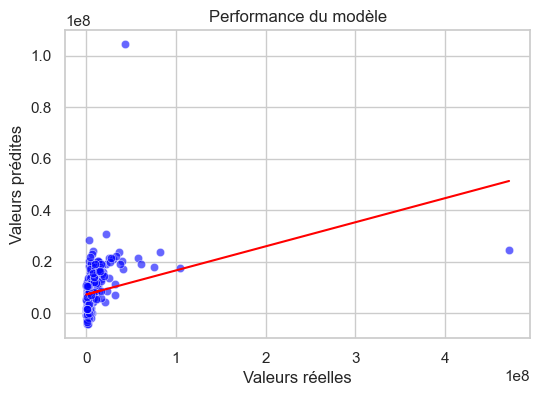

In [46]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test_elasticNet, y=y_pred_elasticNet, alpha=0.6, color='blue')
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.title('Performance du modèle')

# Calculer et tracer la droite de régression
m, b = np.polyfit(y_test_elasticNet, y_pred_elasticNet, 1)
plt.plot(y_test_elasticNet, m*y_test_elasticNet + b, color='red')  # droite de régression
plt.show()

- **Résidus**

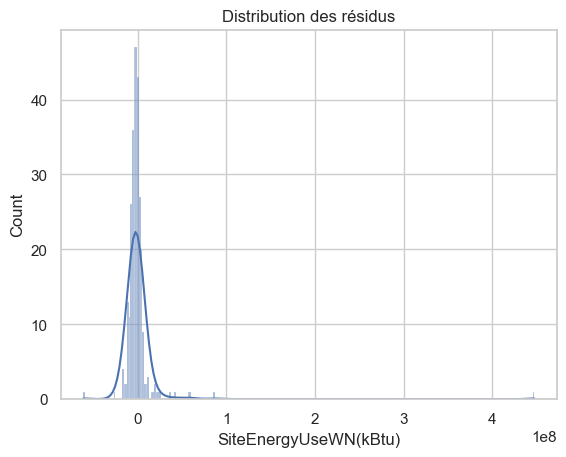

In [47]:
residus = y_test_elasticNet - y_pred_elasticNet
sns.histplot(residus, kde=True)
plt.title("Distribution des résidus")
plt.show()

Pour le **modèle Elastique**, le **coefficient de détermination(R2)** sur les **données test** est **très faible** par rapport aux **données de validation**

#

# **2- Modèle non-linéaire** 

### <span style="color: green"> **Modèle Ridge à noyau** </span>

In [48]:
# entrainement
X_train_kernelRidge = X_train
y_train_kernelRidge = y_train
# validation
X_check_kernelRidge = X_check
y_check_kernelRidge = y_check
# test
X_test_kernelRidge = X_test
y_test_kernelRidge = y_test

# time
start_time_ridge = timeit.default_timer()

### <span style="color: green"> A- **VALIDATION_kernelRidge** </span>

- **Prédiction**

In [49]:
predicteur = kernel_ridge.KernelRidge( alpha = 1.0,  # valeur par défaut 
                                       kernel ='rbf', # noyau Gaussien
                                       gamma = 0.01 )   # valeur de 1/(2 * sigma**2)
                                     
# entraîner le classifieur sur le jeu d'entrainement
predicteur.fit(X_train_kernelRidge, y_train_kernelRidge)
end_time_ridge = timeit.default_timer()
elapsed_kernelridge = end_time_ridge - start_time_ridge
# prédire sur le jeu de validation
y_check_pred_kernelRidge = predicteur.predict(X_check_kernelRidge)

- **Performance du modèle**

In [50]:
from sklearn import metrics

# calcul des métriques sur le jeu de validation
kernel_rmse_valid = (mean_squared_error(y_check_kernelRidge, y_check_pred_kernelRidge))** 0.5
kernel_mae_valid = metrics.mean_absolute_error(y_check_kernelRidge, y_check_pred_kernelRidge)
kernel_r2_valid = metrics.r2_score(y_check_kernelRidge, y_check_pred_kernelRidge)

Meilleurs paramètres : {'alpha': 1, 'l1_ratio': 0.5}
RMSE : 11072723.52
R2 : 0.64
MAE : 4709276.34
time_rigde : 0.09


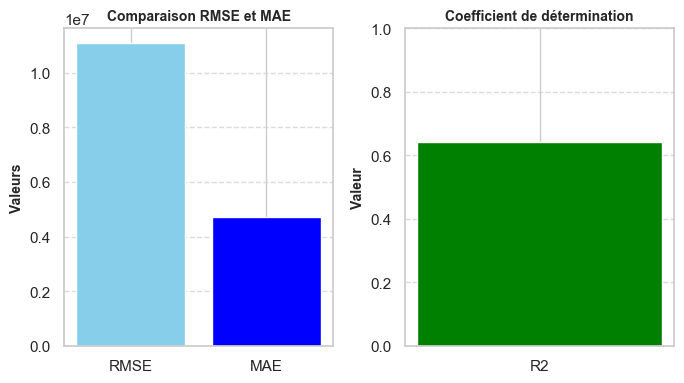

In [51]:
# Affichage des résultats
print('Meilleurs paramètres :', Grid_search.best_params_)
print('RMSE :', round(kernel_rmse_valid,2))
print('R2 :', round(kernel_r2_valid,2))
print('MAE :', round(kernel_mae_valid,2))
print('time_rigde :', round(elapsed_kernelridge,2))

# Visualisation des paramètres RMSE, MAE, R2
fig, axes = plt.subplots(ncols=2, figsize=(7, 4))

# 1. Graphique pour RMSE et MAE
metrics = ['RMSE', 'MAE']
values = [kernel_rmse_valid, kernel_mae_valid]
axes[0].bar(metrics, values, color=['Skyblue', 'blue'])
axes[0].set_title('Comparaison RMSE et MAE', fontsize=10, fontweight = 'bold')
axes[0].set_ylabel('Valeurs', fontsize=10, fontweight = 'bold')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# 2. Graphique pour R2
axes[1].bar(['R2'], [kernel_r2_valid], color='green') # coefficient de détermination commpris entre 0 et 1
axes[1].set_title('Coefficient de détermination', fontsize=10, fontweight = 'bold')
axes[1].set_ylabel('Valeur', fontsize=10, fontweight = 'bold')
axes[1].set_ylim(0, 1)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

- **Visualisation de la prédiction sur les valeurs réelles**

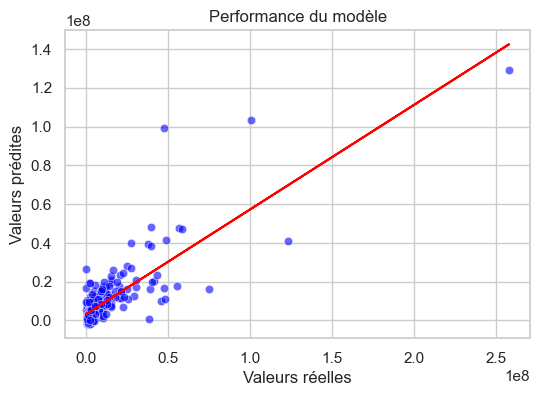

In [52]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_check_kernelRidge, y=y_check_pred_kernelRidge, alpha=0.6, color='blue')
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.title('Performance du modèle')

# Calculer et tracer la droite de régression
m, b = np.polyfit(y_check_kernelRidge, y_check_pred_kernelRidge, 1)
plt.plot(y_check_kernelRidge, m*y_check_kernelRidge + b, color='red')  # droite de régression
plt.show()

- **Réprésentation des résidus**

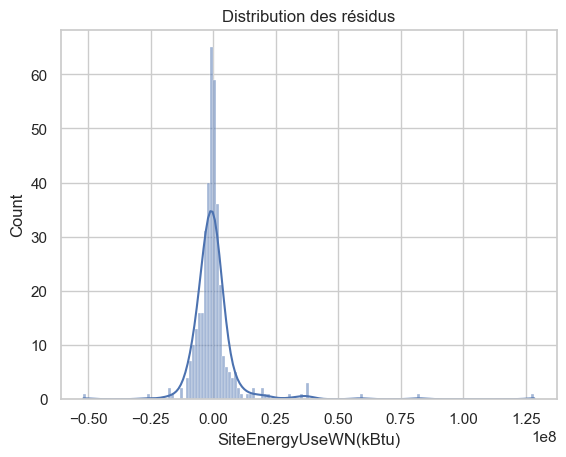

In [53]:
residus = y_check_kernelRidge - y_check_pred_kernelRidge   
sns.histplot(residus, kde=True)
plt.title("Distribution des résidus")
plt.show()

### <span style="color: green"> **B- TEST_kernelRidge** </span>

- **Prédiction**

In [54]:
predicteur = kernel_ridge.KernelRidge( alpha = 1.0,  # valeur par défaut 
                                       kernel ='rbf', # noyau Gaussien
                                       gamma = 0.01 )   # valeur de 1/(2 * sigma**2)
                                     
# entraîner le classifieur sur le jeu d'entrainement
predicteur.fit(X_train_kernelRidge, y_train_kernelRidge)
# prédire sur le jeu de test
y_test_pred_kernelRidge = predicteur.predict(X_test_kernelRidge)

- **Performance du modèle**

In [55]:
from sklearn import metrics
# calcul des métriques sur le jeu de test
kernel_rmse_test = (mean_squared_error(y_test_kernelRidge, y_test_pred_kernelRidge))** 0.5
kernel_mae_test = metrics.mean_absolute_error(y_test_kernelRidge, y_test_pred_kernelRidge)
kernel_r2_test = metrics.r2_score(y_test_kernelRidge, y_test_pred_kernelRidge)

Meilleurs paramètres : {'alpha': 1, 'l1_ratio': 0.5}
RMSE : 26040398.23
R2 : 0.19
MAE : 5771449.67


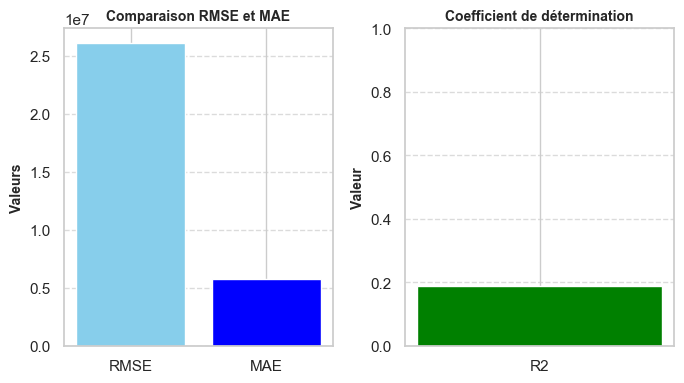

In [56]:
# Affichage des résultats
print('Meilleurs paramètres :', Grid_search.best_params_)
print('RMSE :', round(kernel_rmse_test,2))
print('R2 :', round(kernel_r2_test,2))
print('MAE :', round(kernel_mae_test,2))

# Visualisation des paramètres RMSE, MAE, R2
fig, axes = plt.subplots(ncols=2, figsize=(7, 4))

# 1. Graphique pour RMSE et MAE
metrics = ['RMSE', 'MAE']
values = [kernel_rmse_test, kernel_mae_test]
axes[0].bar(metrics, values, color=['Skyblue', 'blue'])
axes[0].set_title('Comparaison RMSE et MAE', fontsize=10, fontweight = 'bold')
axes[0].set_ylabel('Valeurs', fontsize=10, fontweight = 'bold')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# 2. Graphique pour R2
axes[1].bar(['R2'], [kernel_r2_test], color='green') # coefficient de détermination commpris entre 0 et 1
axes[1].set_title('Coefficient de détermination', fontsize=10, fontweight = 'bold')
axes[1].set_ylabel('Valeur', fontsize=10, fontweight = 'bold')
axes[1].set_ylim(0, 1)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

- **Visualisation de la prédiction sur les valeurs réelles**

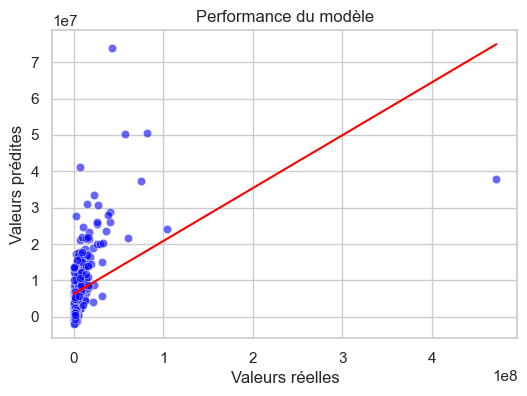

In [57]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test_kernelRidge, y=y_test_pred_kernelRidge, alpha=0.6, color='blue')
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.title('Performance du modèle')

# Calculer et tracer la droite de régression
m, b = np.polyfit(y_test_kernelRidge, y_test_pred_kernelRidge, 1)
plt.plot(y_test_kernelRidge, m*y_test_kernelRidge + b, color='red')  # droite de régression
plt.show()

- **Réprésentation des résidus**

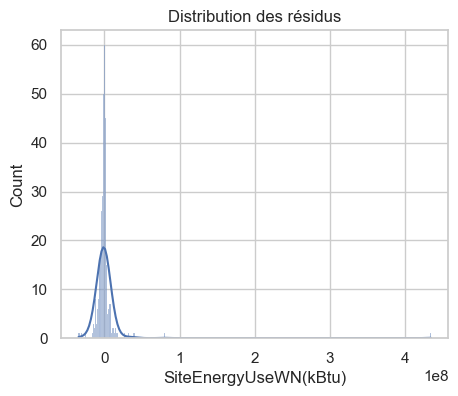

In [58]:
residus = y_test_kernelRidge - y_test_pred_kernelRidge  
plt.figure(figsize=(5,4))
sns.histplot(residus, kde=True)
plt.title("Distribution des résidus")
plt.show()

#####

## <span style="color: green"> **2-2 - Modèle Gradient Boosting**</span>

- **Hyperparamètres**

In [59]:
params_GB = {
             'n_estimators': [50, 100, 200],
             'learning_rate': [0.01, 0.1, 0.5],
             'max_depth': [3, 5, 7]
            }

X_train_GB = X_train
y_train_GB = y_train
X_check_GB = X_check
y_check_GB = y_check
X_test_GB = X_test
y_test_GB = y_test

In [60]:
# modèle de Gradient Boosting
Gradient_Boosting_reg = GradientBoostingRegressor(n_estimators = 100, learning_rate=0.1, max_depth=3, random_state = 5 )
start_time_GB = timeit.default_timer()

- **Recherche des meilleurs paramètres**

In [61]:
# Meilleurs hyperparamètres
grid_search = GridSearchCV(Gradient_Boosting_reg, params_GB, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_GB, y_train_GB)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=5),
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [62]:
# Affichage des meilleurs paramètres et du meilleur score
print("Meilleurs paramètres : ", grid_search.best_params_)
print("Meilleur score : ", -grid_search.best_score_)

Meilleurs paramètres :  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Meilleur score :  193157616677206.34


- **Nouvelle entrainnement du modèle avec les nouveaux paramètres**

In [63]:
# Entraînement du modèle 
best_Gradient_Boosting = GradientBoostingRegressor(**grid_search.best_params_)
best_Gradient_Boosting.fit(X_train_GB, y_train_GB)
end_time_GB = timeit.default_timer()
elapsed_GB = end_time_GB - start_time_GB

In [64]:
print(best_Gradient_Boosting)

GradientBoostingRegressor()


### <span style="color: green">A- **VALIDATION_Gradient_Boosting**</span>

- **Prédiction des données tests avec les meilleurs paramètres**

In [65]:
# Prédiction
y_check_pred_GB = best_Gradient_Boosting.predict(X_check_GB)

- **Preformance du modèle**

In [66]:
from sklearn import metrics

# Calcul des métriques
GB_rmse_valid = (mean_squared_error(y_check_GB, y_check_pred_GB))** 0.5
GB_r2_valid = r2_score(y_check_GB, y_check_pred_GB)
GB_mae_valid = mean_absolute_error(y_check_GB, y_check_pred_GB)

- **Graphe des résultats**

Meilleurs paramètres : {'alpha': 1, 'l1_ratio': 0.5}
RMSE : 12184849.84
R2 : 0.57
MAE : 3725936.7
time_GB: 74.05


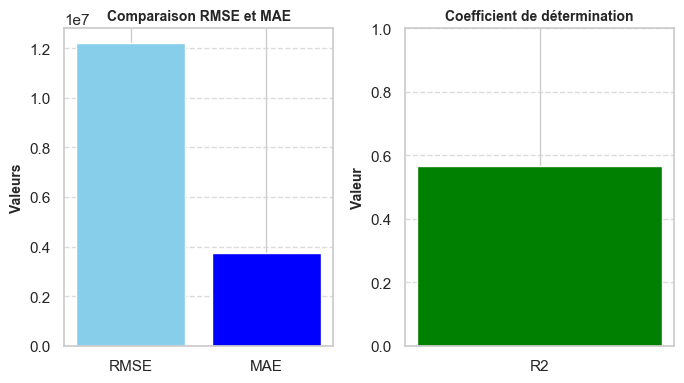

In [67]:
# Affichage des résultats
print('Meilleurs paramètres :', Grid_search.best_params_)
print('RMSE :', round(GB_rmse_valid,2))
print('R2 :', round(GB_r2_valid,2))
print('MAE :', round(GB_mae_valid,2))
print('time_GB:', round(elapsed_GB,2))

# Visualisation des paramètres RMSE, MAE, R2
fig, axes = plt.subplots(ncols=2, figsize=(7, 4))

# 1. Graphique pour RMSE et MAE
metrics = ['RMSE', 'MAE']
values = [GB_rmse_valid, GB_mae_valid]
axes[0].bar(metrics, values, color=['Skyblue', 'blue'])
axes[0].set_title('Comparaison RMSE et MAE', fontsize=10, fontweight = 'bold')
axes[0].set_ylabel('Valeurs', fontsize=10, fontweight = 'bold')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# 2. Graphique pour R2
axes[1].bar(['R2'], [GB_r2_valid], color='green') # coefficient de détermination commpris entre 0 et 1
axes[1].set_title('Coefficient de détermination', fontsize=10, fontweight = 'bold')
axes[1].set_ylabel('Valeur', fontsize=10, fontweight = 'bold')
axes[1].set_ylim(0, 1)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

- **Droite de regression**

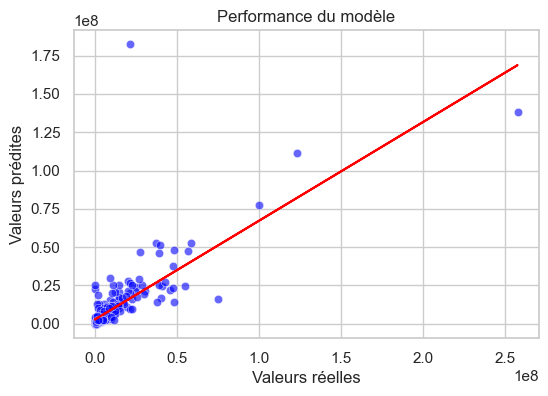

In [68]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_check_GB, y=y_check_pred_GB, alpha=0.6, color='blue')
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.title('Performance du modèle')

# Calculons  et tracons la droite de régression
m, b = np.polyfit(y_check_GB, y_check_pred_GB, 1)
plt.plot(y_check_GB, m*y_check_GB + b, color='red')  # droite de régression
plt.show()

- **Graphe de résidus**

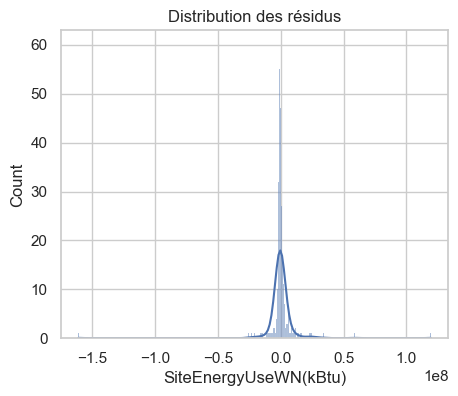

In [69]:
plt.figure(figsize=(5, 4))
residus = y_check_GB - y_check_pred_GB
sns.histplot(residus, kde=True)
plt.title("Distribution des résidus")
plt.show()

### <span style="color: green"> B-**TEST_Gradient_Boosting** </span>

- **Prédiction des données tests avec les meilleurs paramètres**

In [70]:
# Prédiction
y_test_pred_GB = best_Gradient_Boosting.predict(X_test_GB)

- **Preformance du modèle**

In [71]:
from sklearn import metrics

# Calcul des métriques
GB_rmse_test = (mean_squared_error(y_test_GB, y_test_pred_GB))** 0.5
GB_r2_test = r2_score(y_test_GB, y_test_pred_GB)
GB_mae_test = mean_absolute_error(y_test_GB, y_test_pred_GB)

- **Graphe des résultats**

Meilleurs paramètres : {'alpha': 1, 'l1_ratio': 0.5}
RMSE : 26959947.66
R2 : 0.13
MAE : 5267769.34


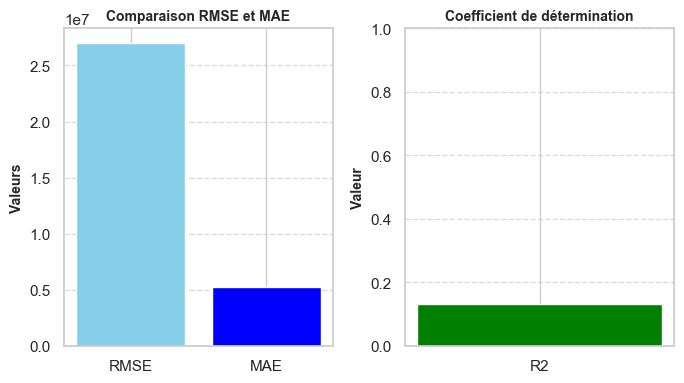

In [72]:
# Affichage des résultats
print('Meilleurs paramètres :', Grid_search.best_params_)
print('RMSE :', round(GB_rmse_test,2))
print('R2 :', round(GB_r2_test,2))
print('MAE :', round(GB_mae_test,2))

# Visualisation des paramètres RMSE, MAE, R2
fig, axes = plt.subplots(ncols=2, figsize=(7, 4))

# 1. Graphique pour RMSE et MAE
metrics = ['RMSE', 'MAE']
values = [GB_rmse_test, GB_mae_test]
axes[0].bar(metrics, values, color=['Skyblue', 'blue'])
axes[0].set_title('Comparaison RMSE et MAE', fontsize=10, fontweight = 'bold')
axes[0].set_ylabel('Valeurs', fontsize=10, fontweight = 'bold')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# 2. Graphique pour R2
axes[1].bar(['R2'], [GB_r2_test], color='green') # coefficient de détermination commpris entre 0 et 1
axes[1].set_title('Coefficient de détermination', fontsize=10, fontweight = 'bold')
axes[1].set_ylabel('Valeur', fontsize=10, fontweight = 'bold')
axes[1].set_ylim(0, 1)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

- **Droite de regression**

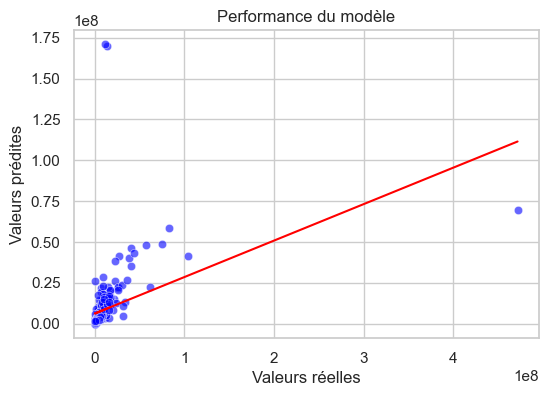

In [73]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test_GB, y=y_test_pred_GB, alpha=0.6, color='blue')
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.title('Performance du modèle')

# Calculons  et tracons la droite de régression
m, b = np.polyfit(y_test_GB, y_test_pred_GB, 1)
plt.plot(y_test_GB, m*y_test_GB + b, color='red')  # droite de régression
plt.show()

- **Graphe de résidus**

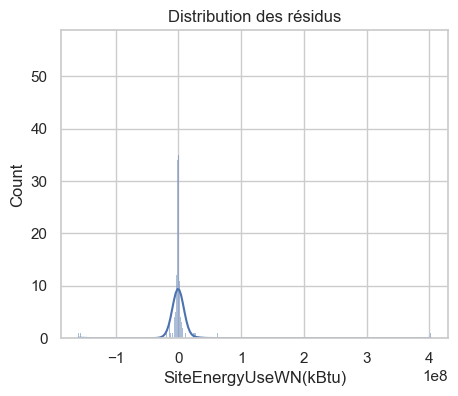

In [74]:
plt.figure(figsize=(5, 4))
residus = y_test_GB - y_test_pred_GB
sns.histplot(residus, kde=True)
plt.title("Distribution des résidus")
plt.show()

#

## <span style="color: green"> **2-3 - Random Forest Regressor** </span>

- **Définition du modèle**

In [75]:
# Initialiser le modèle
rand_forest = RandomForestRegressor()
start_time_rf = timeit.default_timer()

- **Paramètres**

In [76]:
# hyperparamètres du modèle randomForest
rand_param = {
                "n_estimators": [50, 100, 150],
                "max_depth": [None, 5, 10],
                "min_samples_split": [2, 5],
                "min_samples_leaf": [1, 2]
            }
# train
X_train_rf = X_train
y_train_rf = y_train
# validation
X_check_rf = X_check
y_check_rf = y_check
# test
X_test_rf = X_test
y_test_rf = y_test

- **Entrainement avec les nouveaux paramètres**

In [77]:
start_time_rf = timeit.default_timer()
rand_search = GridSearchCV(rand_forest, rand_param, cv=5, scoring="neg_mean_squared_error")
rand_search.fit(X_train_rf, y_train_rf)
end_time_rf = timeit.default_timer()
elapsed_rf = end_time_rf - start_time_rf

- **Meilleurs hyperparamètres**

In [78]:
# Obtenir les meilleurs hyperparamètres et le meilleur modèle
best_param = rand_search.best_params_
print(best_param)
best_model0 = rand_search.best_estimator_
print(best_model0)

{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
RandomForestRegressor(max_depth=5)


### <span style="color: red"> A- **VALIDATION_rf** </span>

- **Prédiction du Modèle**

In [79]:
y_check_pred_rf = best_model0.predict(X_check_rf)

- **Performance du Modèle**

In [80]:
from sklearn import metrics
# Calculons  la RMSE,r2,mae
rf_rmse_valid = (mean_squared_error(y_check_rf, y_check_pred_rf))** 0.5
rf_r2_valid = r2_score(y_check_rf, y_check_pred_rf)
rf_mae_valid = mean_absolute_error(y_check_rf, y_check_pred_rf)

- **Résultats graphiques**

Meilleurs paramètres : {'alpha': 1, 'l1_ratio': 0.5}
RMSE : 10305771.2
R2 : 0.69
MAE : 3934032.15
time_rf: 118.18


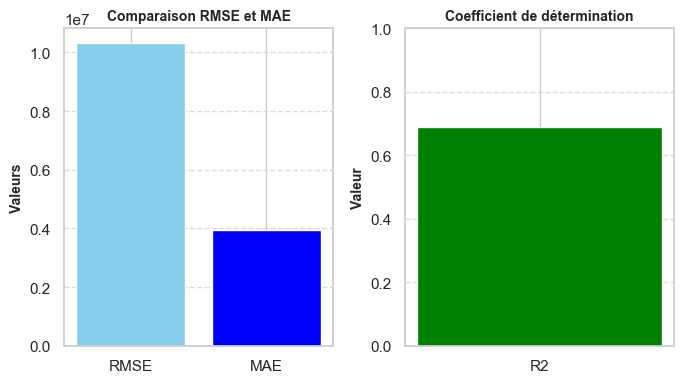

In [81]:
# Affichage des résultats
print('Meilleurs paramètres :', Grid_search.best_params_)
print('RMSE :', round(rf_rmse_valid,2))
print('R2 :', round(rf_r2_valid,2))
print('MAE :', round(rf_mae_valid,2))
print('time_rf:',round(elapsed_rf,2))

# Visualisation des paramètres RMSE, MAE, R2
fig, axes = plt.subplots(ncols=2, figsize=(7, 4))

# 1. Graphique pour RMSE et MAE
metrics = ['RMSE', 'MAE']
values = [rf_rmse_valid, rf_mae_valid]
axes[0].bar(metrics, values, color=['Skyblue', 'blue'])
axes[0].set_title('Comparaison RMSE et MAE', fontsize=10, fontweight = 'bold')
axes[0].set_ylabel('Valeurs', fontsize=10, fontweight = 'bold')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# 2. Graphique pour R2
axes[1].bar(['R2'], [rf_r2_valid], color='green') # coefficient de détermination commpris entre 0 et 1
axes[1].set_title('Coefficient de détermination', fontsize=10, fontweight = 'bold')
axes[1].set_ylabel('Valeur', fontsize=10, fontweight = 'bold')
axes[1].set_ylim(0, 1)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

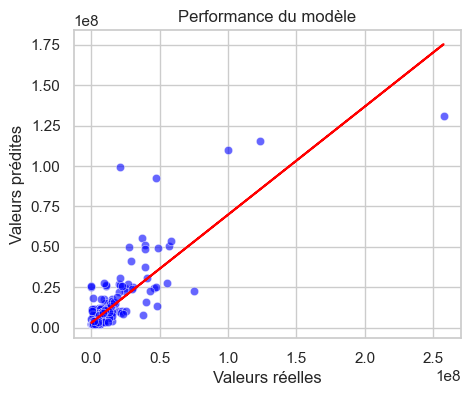

In [82]:
plt.figure(figsize=(5, 4))
sns.scatterplot(x=y_check_rf, y=y_check_pred_rf, alpha=0.6, color='blue')
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.title('Performance du modèle')

# Calculons  et tracons la droite de régression
m, b = np.polyfit(y_check_rf, y_check_pred_rf, 1)
plt.plot(y_check_rf, m*y_check_rf + b, color='red')  # droite de régression
plt.show()

### <span style="color: red"> B- **TEST_rf** </span>

- **Prédiction du Modèle**

In [83]:
y_test_pred_rf = best_model0.predict(X_test_rf)

- **Performance du Modèle**

In [84]:
from sklearn import metrics
# Calculons  la RMSE,r2,mae
rf_rmse_test = (mean_squared_error(y_test_rf, y_test_pred_rf))** 0.5
rf_r2_test = r2_score(y_test_rf, y_test_pred_rf)
rf_mae_test = mean_absolute_error(y_test_rf, y_test_pred_rf)

- **Résultats graphiques**

Meilleurs paramètres : {'alpha': 1, 'l1_ratio': 0.5}
RMSE : 25917351.62
R2 : 0.2
MAE : 5698847.09


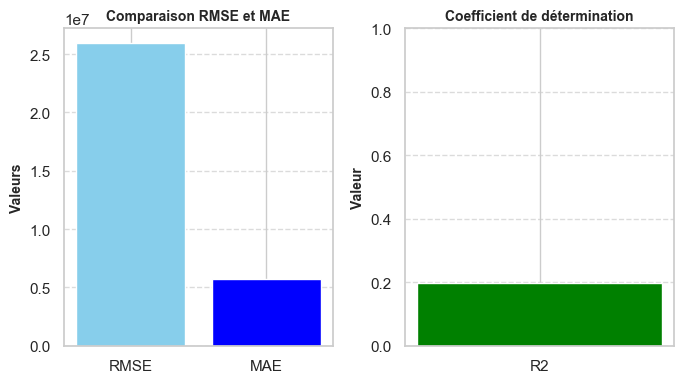

In [85]:
# Affichage des résultats
print('Meilleurs paramètres :', Grid_search.best_params_)
print('RMSE :', round(rf_rmse_test,2))
print('R2 :', round(rf_r2_test,2))
print('MAE :', round(rf_mae_test,2))

# Visualisation des paramètres RMSE, MAE, R2
fig, axes = plt.subplots(ncols=2, figsize=(7, 4))

# 1. Graphique pour RMSE et MAE
metrics = ['RMSE', 'MAE']
values = [rf_rmse_test, rf_mae_test]
axes[0].bar(metrics, values, color=['Skyblue', 'blue'])
axes[0].set_title('Comparaison RMSE et MAE', fontsize=10, fontweight = 'bold')
axes[0].set_ylabel('Valeurs', fontsize=10, fontweight = 'bold')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# 2. Graphique pour R2
axes[1].bar(['R2'], [rf_r2_test], color='green') # coefficient de détermination commpris entre 0 et 1
axes[1].set_title('Coefficient de détermination', fontsize=10, fontweight = 'bold')
axes[1].set_ylabel('Valeur', fontsize=10, fontweight = 'bold')
axes[1].set_ylim(0, 1)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

- **droite de regression**

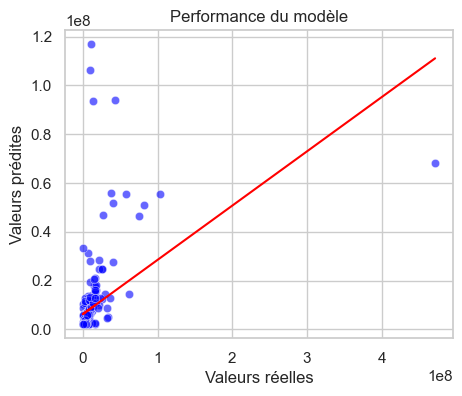

In [86]:
plt.figure(figsize=(5, 4))
sns.scatterplot(x=y_test_rf, y=y_test_pred_rf, alpha=0.6, color='blue')
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.title('Performance du modèle')

# Calculons  et tracons la droite de régression
m, b = np.polyfit(y_test_rf, y_test_pred_rf, 1)
plt.plot(y_test_rf, m*y_test_rf + b, color='red')  # droite de régression
plt.show()

#

##  <span style="color: black"> **2.4 - Modèle Support Vector Machine(SVM)** </span>

In [87]:
# Entrainement
X_train_SVM = X_train
y_train_SVM = y_train
# validation
X_check_SVM = X_check
y_check_SVM = y_check
# test
X_test_SVM = X_test
y_test_SVM = y_test

- **Meilleurs paramètres**

In [88]:
SVM_Parameter = {
                        'C': [0.01,0.1, 1, 10, 100],
                  'epsilon': [0.01, 0.1, 1],
                   'kernel': ['linear', 'rbf', 'poly'],
                    'gamma': ['scale', 'auto']
                }

- **Modèle SVM**

In [89]:
svr = SVR()
start_time_SVM = timeit.default_timer()

- **Entrainnement**

In [90]:
grid_search = GridSearchCV(svr, SVM_Parameter, cv=5, scoring="neg_mean_squared_error")
grid_search.fit(X_train_SVM, y_train_SVM)
end_time = timeit.default_timer()
elapsed_SVM = end_time - start_time_SVM

- **Meilleurs paramètres**

In [91]:
# Obtenir les meilleurs hyperparamètres et le meilleur modèle
best_param = grid_search.best_params_
print(best_param)
best_model = grid_search.best_estimator_
print(best_model)

{'C': 100, 'epsilon': 0.01, 'gamma': 'scale', 'kernel': 'linear'}
SVR(C=100, epsilon=0.01, kernel='linear')


### <span style="color: blue"> A- **VALIDATION_SVM** </span>

- **Prédiction**

In [92]:
# Prédire les résultats sur l'ensemble de validation
y_check_pred_SVM = best_model.predict(X_check_SVM)

- **Performances du modèle**

In [93]:
from sklearn import metrics

# Calcul des métriques
SVM_rmse_valid = (mean_squared_error(y_check_SVM, y_check_pred_SVM))** 0.5
SVM_r2_valid = r2_score(y_check_SVM, y_check_pred_SVM)
SVM_mae_valid = mean_absolute_error(y_check_SVM, y_check_pred_SVM)

- **Graphique des résultats**

Meilleurs paramètres : {'alpha': 1, 'l1_ratio': 0.5}
RMSE : 19144875.91
R2 : -0.07
MAE : 6610840.74
time_SVM : 24.51 secondes


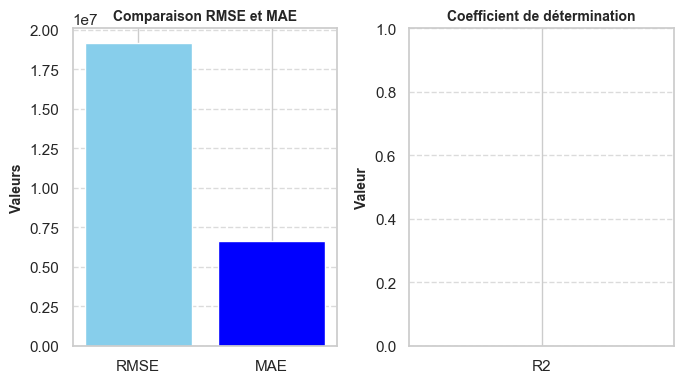

In [94]:
# Affichage des résultats
print('Meilleurs paramètres :', Grid_search.best_params_)
print('RMSE :', round(SVM_rmse_valid,2))
print('R2 :', round(SVM_r2_valid,2))
print('MAE :', round(SVM_mae_valid,2))
print('time_SVM :', round(elapsed_SVM,2),'secondes')

# Visualisation des paramètres RMSE, MAE, R2
fig, axes = plt.subplots(ncols=2, figsize=(7, 4))

# 1. Graphique pour RMSE et MAE
metrics = ['RMSE', 'MAE']
values = [SVM_rmse_valid, SVM_mae_valid]
axes[0].bar(metrics, values, color=['Skyblue', 'blue'])
axes[0].set_title('Comparaison RMSE et MAE', fontsize=10, fontweight = 'bold')
axes[0].set_ylabel('Valeurs', fontsize=10, fontweight = 'bold')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# 2. Graphique pour R2
axes[1].bar(['R2'], [SVM_r2_valid], color='green') # coefficient de détermination commpris entre 0 et 1
axes[1].set_title('Coefficient de détermination', fontsize=10, fontweight = 'bold')
axes[1].set_ylabel('Valeur', fontsize=10, fontweight = 'bold')
axes[1].set_ylim(0, 1)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

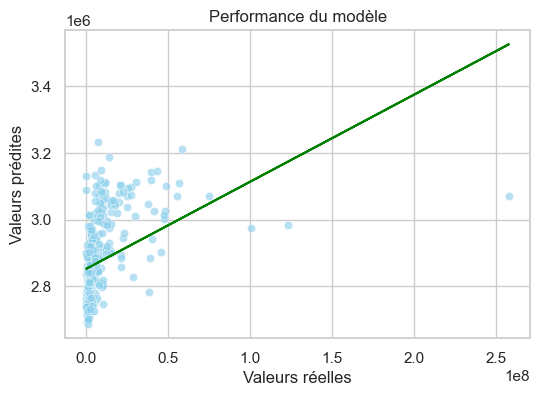

In [95]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_check_SVM, y=y_check_pred_SVM, alpha=0.6, color='skyblue')
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.title('Performance du modèle')

# Calculons  et tracons la droite de régression
m, b = np.polyfit(y_check_SVM, y_check_pred_SVM, 1)
plt.plot(y_check_SVM, m*y_check_SVM + b, color='green')  # droite de régression
plt.show()

### <span style="color: Skyblue">B- **TEST_SVM** </span>

- **Prédiction**

In [96]:
# Prédire les résultats sur l'ensemble de test
y_test_pred_SVM = best_model.predict(X_test_SVM)

- **Performances du modèle**

In [97]:
from sklearn import metrics
# Calcul des métriques
SVM_rmse_test = (mean_squared_error(y_test_SVM, y_test_pred_SVM))** 0.5
SVM_r2_test = r2_score(y_test_SVM, y_test_pred_SVM)
SVM_mae_test = mean_absolute_error(y_test_SVM, y_test_pred_SVM)

- **Graphique des résultats**

Meilleurs paramètres : {'alpha': 1, 'l1_ratio': 0.5}
RMSE : 29392646.43
R2 : -0.03
MAE : 6937296.67


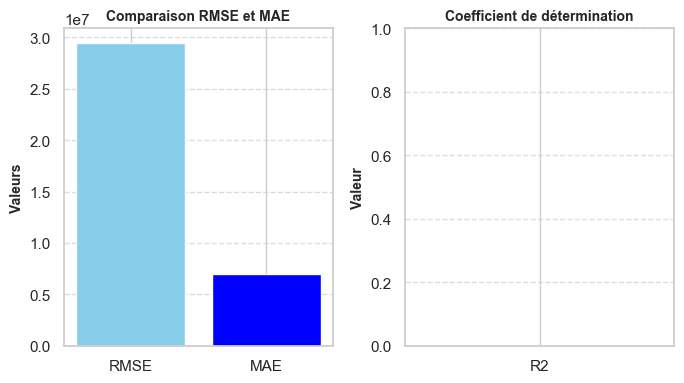

In [98]:
# Affichage des résultats
print('Meilleurs paramètres :', Grid_search.best_params_)
print('RMSE :', round(SVM_rmse_test,2))
print('R2 :', round(SVM_r2_test,2))
print('MAE :', round(SVM_mae_test,2))

# Visualisation des paramètres RMSE, MAE, R2
fig, axes = plt.subplots(ncols=2, figsize=(7, 4))

# 1. Graphique pour RMSE et MAE
metrics = ['RMSE', 'MAE']
values = [SVM_rmse_test, SVM_mae_test]
axes[0].bar(metrics, values, color=['Skyblue', 'blue'])
axes[0].set_title('Comparaison RMSE et MAE', fontsize=10, fontweight = 'bold')
axes[0].set_ylabel('Valeurs', fontsize=10, fontweight = 'bold')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# 2. Graphique pour R2
axes[1].bar(['R2'], [SVM_r2_test], color='green') # coefficient de détermination commpris entre 0 et 1
axes[1].set_title('Coefficient de détermination', fontsize=10, fontweight = 'bold')
axes[1].set_ylabel('Valeur', fontsize=10, fontweight = 'bold')
axes[1].set_ylim(0, 1)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

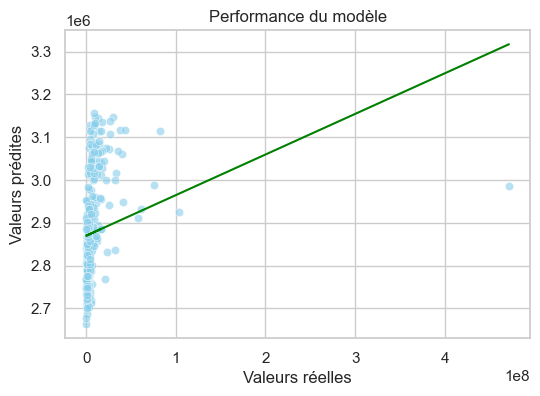

In [99]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test_SVM, y=y_test_pred_SVM, alpha=0.6, color='skyblue')
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.title('Performance du modèle')

# Calculons  et tracons la droite de régression
m, b = np.polyfit(y_test_SVM, y_test_pred_SVM, 1)
plt.plot(y_test_SVM, m*y_test_SVM + b, color='green')  # droite de régression
plt.show()

#

### **3- Graphes Récapitulatifs des performances**  

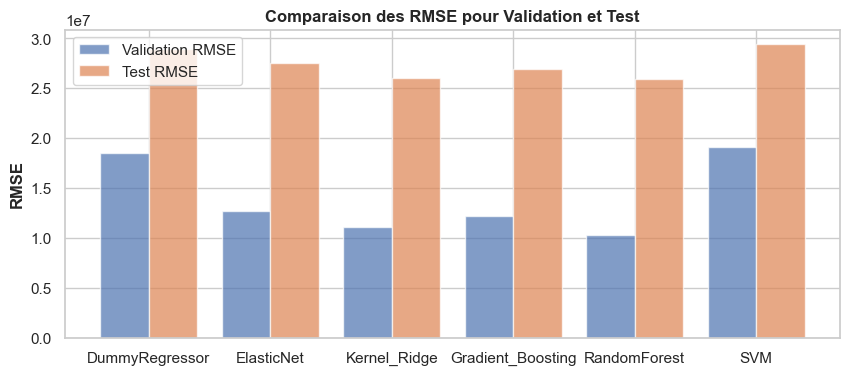

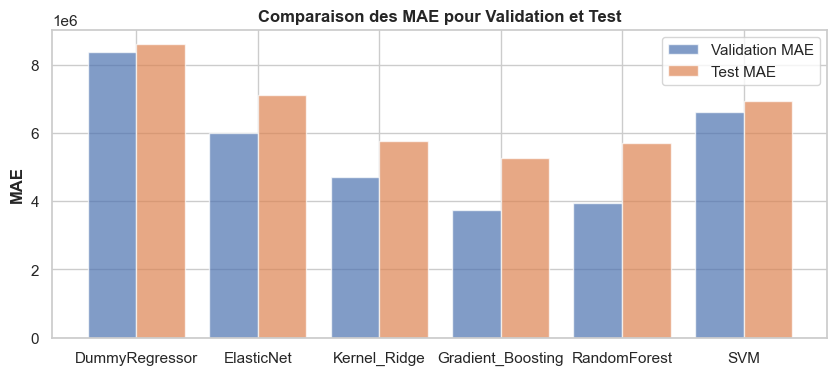

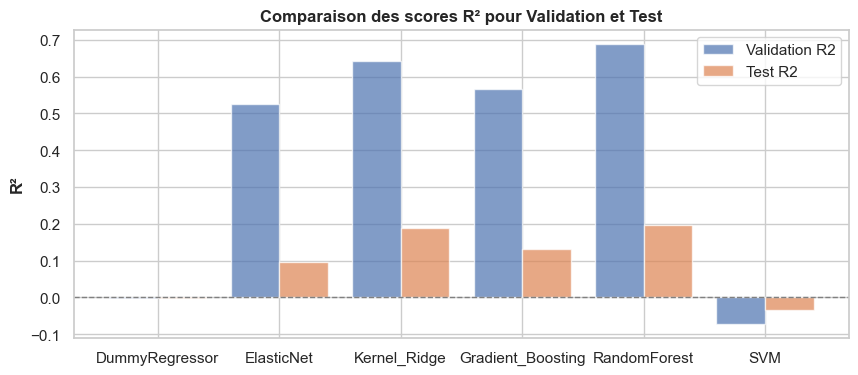

In [100]:
# visualisation des différents graphique de performances
# Modèles
models = ["DummyRegressor","ElasticNet", "Kernel_Ridge", "Gradient_Boosting", "RandomForest","SVM"]

# Données pour validation
validation_rmse = [dummy_rmse_valid, elasticNet_rmse_valid, kernel_rmse_valid, GB_rmse_valid, rf_rmse_valid, SVM_rmse_valid]
validation_mae = [dummy_mae_valid, elasticNet_mae_valid, kernel_mae_valid, GB_mae_valid, rf_mae_valid, SVM_mae_valid]
validation_r2 = [dummy_r2_valid, elasticNet_r2_valid, kernel_r2_valid, GB_r2_valid, rf_r2_valid, SVM_r2_valid]

# Données pour test
test_rmse = [dummy_rmse_test, elasticNet_rmse_test, kernel_rmse_test, GB_rmse_test, rf_rmse_test, SVM_rmse_test]
test_mae = [dummy_mae_test, elasticNet_mae_test, kernel_mae_test, GB_mae_test, rf_mae_test, SVM_mae_test]
test_r2 = [dummy_r2_test, elasticNet_r2_test, kernel_r2_test, GB_r2_test, rf_r2_test, SVM_r2_test]

# Graphiques pour RMSE et MAE
x = np.arange(len(models))  # Positions sur l'axe x  

plt.figure(figsize=(10, 4))

# RMSE
plt.bar(x - 0.2, validation_rmse, width=0.4, label='Validation RMSE', alpha=0.7)
plt.bar(x + 0.2, test_rmse, width=0.4, label='Test RMSE', alpha=0.7)
plt.xticks(x, models)
plt.ylabel('RMSE', fontweight="bold")
plt.title('Comparaison des RMSE pour Validation et Test', fontweight="bold")
plt.legend()
plt.show()

# MAE
plt.figure(figsize=(10, 4))
plt.bar(x - 0.2, validation_mae, width=0.4, label='Validation MAE', alpha=0.7)
plt.bar(x + 0.2, test_mae, width=0.4, label='Test MAE', alpha=0.7)
plt.xticks(x, models)
plt.ylabel('MAE', fontweight="bold")
plt.title('Comparaison des MAE pour Validation et Test', fontweight="bold")
plt.legend()
plt.show()

# Graphique pour R2
plt.figure(figsize=(10, 4))
plt.bar(x - 0.2, validation_r2, width=0.4, label='Validation R2', alpha=0.7)
plt.bar(x + 0.2, test_r2, width=0.4, label='Test R2', alpha=0.7)
plt.xticks(x, models)
plt.ylabel('R²', fontweight="bold")
plt.title('Comparaison des scores R² pour Validation et Test', fontweight="bold")
plt.axhline(0, color='gray', linestyle='--', linewidth=1)  # Ligne pour R2=0
plt.legend()
plt.show()

### **4- Visualisation du temps d'exécution des différents modèles**

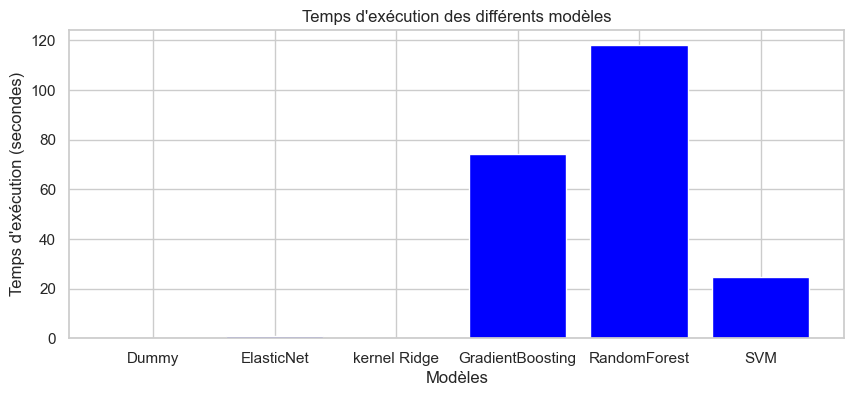

In [101]:
# Liste  des modèles
models = ['Dummy', 'ElasticNet','kernel Ridge', 'GradientBoosting','RandomForest', 'SVM']

# Temps d'exécution correspondants à chaque modèle 
execution_times = [elapsed_dummy, elapsed_elasticNet, elapsed_kernelridge, elapsed_GB, elapsed_rf, elapsed_SVM]


# Création du graphique à barres
plt.figure(figsize=(10, 4))
plt.bar(models, execution_times, color='blue')

# Ajouter des titres et des étiquettes
plt.title('Temps d\'exécution des différents modèles')
plt.xlabel('Modèles')
plt.ylabel('Temps d\'exécution (secondes)')
plt.show()

#

### **4- Choix des Features Importants**

In [102]:
# Le meilheure modèle choisi
best_model0

RandomForestRegressor(max_depth=5)

In [103]:
# calcul de l'importance de chaque variable dans le modèle Random Forest
importance = best_model0.feature_importances_

In [104]:
# Récupérer les noms de chaque colonne (feature) 
feature_names =  X.columns
feature_names

Index(['ENERGYSTARScore', 'Longitude', 'Latitude', 'LargestPropertyUseTypeGFA',
       'GFA_Building_Rate', 'GFA_Parking_Rate', 'SumUseType',
       'Building_Age_label_encoded', 'NumberofFloors_label_encoded',
       'NumberofBuildings_label_encoded', 'Neighborhood_BALLARD',
       'Neighborhood_Ballard', 'Neighborhood_CENTRAL', 'Neighborhood_Central',
       'Neighborhood_DELRIDGE', 'Neighborhood_DELRIDGE NEIGHBORHOODS',
       'Neighborhood_DOWNTOWN', 'Neighborhood_Delridge', 'Neighborhood_EAST',
       'Neighborhood_GREATER DUWAMISH', 'Neighborhood_LAKE UNION',
       'Neighborhood_MAGNOLIA / QUEEN ANNE', 'Neighborhood_NORTH',
       'Neighborhood_NORTHEAST', 'Neighborhood_NORTHWEST',
       'Neighborhood_North', 'Neighborhood_Northwest',
       'Neighborhood_SOUTHEAST', 'Neighborhood_SOUTHWEST',
       'PrimaryPropertyType_Distribution Center',
       'PrimaryPropertyType_Hospital', 'PrimaryPropertyType_Hotel',
       'PrimaryPropertyType_K-12 School', 'PrimaryPropertyType_Laborat

In [105]:
# Calcule de l'écart-type des importances des différentes variables (features) du modèle
std = np.std([tree.feature_importances_ for tree in best_model0.estimators_], axis=0)
std

array([6.78991914e-02, 3.49774696e-02, 4.20448726e-02, 2.09268170e-01,
       2.53550408e-02, 1.42892414e-02, 5.63410583e-02, 2.71966609e-02,
       2.42168284e-02, 1.99210925e-02, 6.26734566e-05, 0.00000000e+00,
       8.85164462e-03, 0.00000000e+00, 1.18641370e-03, 0.00000000e+00,
       3.12430617e-03, 0.00000000e+00, 9.31382401e-02, 8.58047258e-04,
       2.85940360e-02, 1.32376464e-03, 0.00000000e+00, 9.95670850e-03,
       1.23681321e-04, 0.00000000e+00, 0.00000000e+00, 1.63095687e-05,
       6.69179610e-03, 1.31813826e-04, 2.26759038e-01, 1.93674196e-03,
       0.00000000e+00, 4.70661726e-03, 4.85994381e-04, 0.00000000e+00,
       1.71944818e-03, 7.97262334e-03, 4.31954239e-02, 0.00000000e+00,
       0.00000000e+00, 1.46207969e-04, 4.79562879e-04, 2.64854535e-04,
       4.92172623e-05, 0.00000000e+00, 1.73847836e-03, 9.17166485e-04,
       4.55757391e-04, 0.00000000e+00, 9.68945072e-03, 2.78409535e-03,
       1.96777556e-04, 0.00000000e+00, 0.00000000e+00])

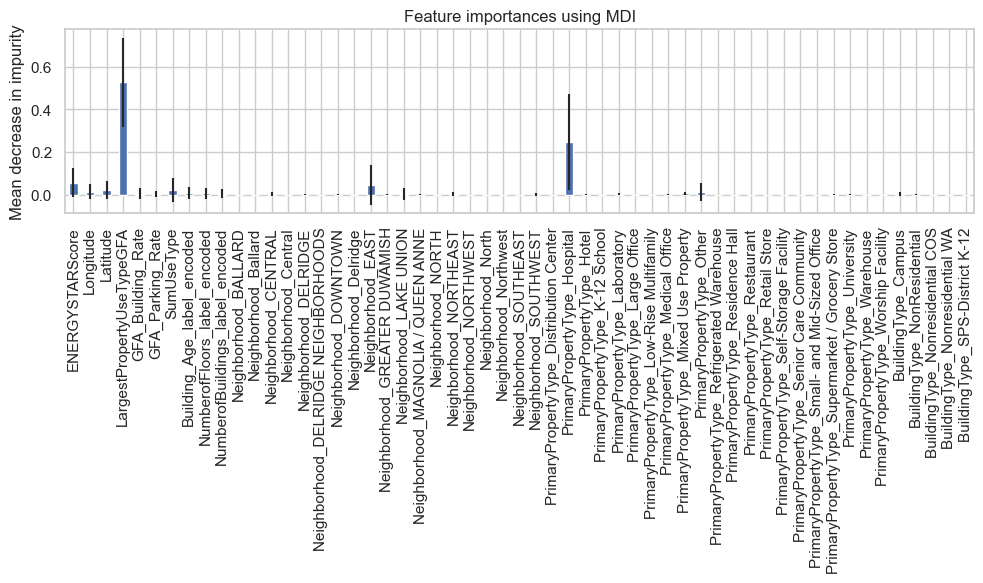

In [106]:
# Créer une série pandas contenant les importances de chaque caractéristique
forest_importances = pd.Series(importance, index=feature_names)

fig, ax = plt.subplots(figsize=(10, 6)) 

# Tracer le graphique des importances
forest_importances.plot.bar(yerr=std, ax=ax)

# Ajouter un titre et des labels
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")

# Ajuster la mise en page
fig.tight_layout()

In [107]:
pip install shap

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [108]:
pip install numpy==1.22.0 numba

Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-1.22.0.zip (11.3 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build numpy
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [202 lines of output]
  setup.py:66: RuntimeWarning: NumPy 1.22.0 may not yet support Python 3.11.
    warnings.warn(
  Running from numpy source directory.
  Processing numpy/random\_bounded_integers.pxd.in
  Processing numpy/random\bit_generator.pyx
  Processing numpy/random\mtrand.pyx
  Processing numpy/random\_bounded_integers.pyx.in
  Processing numpy/random\_common.pyx
  Processing numpy/random\_generator.pyx
  Processing numpy/random\_mt19937.pyx
  Processing numpy/random\_pcg64.pyx
  Processing numpy/random\_philox.pyx
  Processing numpy/random\_sfc64.pyx
  Cythonizing sources
  INFO: blas_opt_info:
  INFO: blas_armpl_info:
  INFO: No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  INFO: customize MSVCCompiler
  INFO:   libraries armpl_lp64_mp not found in ['C:\\ProgramData\\anaconda3\\lib', 'C:\\', 'C:\\ProgramData\\anaconda3\\libs']
  INFO:   NOT AVAILABLE
  INFO:
  INFO: bla

- **Best feature**

In [109]:
import shap
# la contribution de chaque featue à l'ensemble des prédictions du modèle sur l'ensemble de données de test
explainer = shap.TreeExplainer(best_model0)
shap_values = explainer.shap_values(X_test)

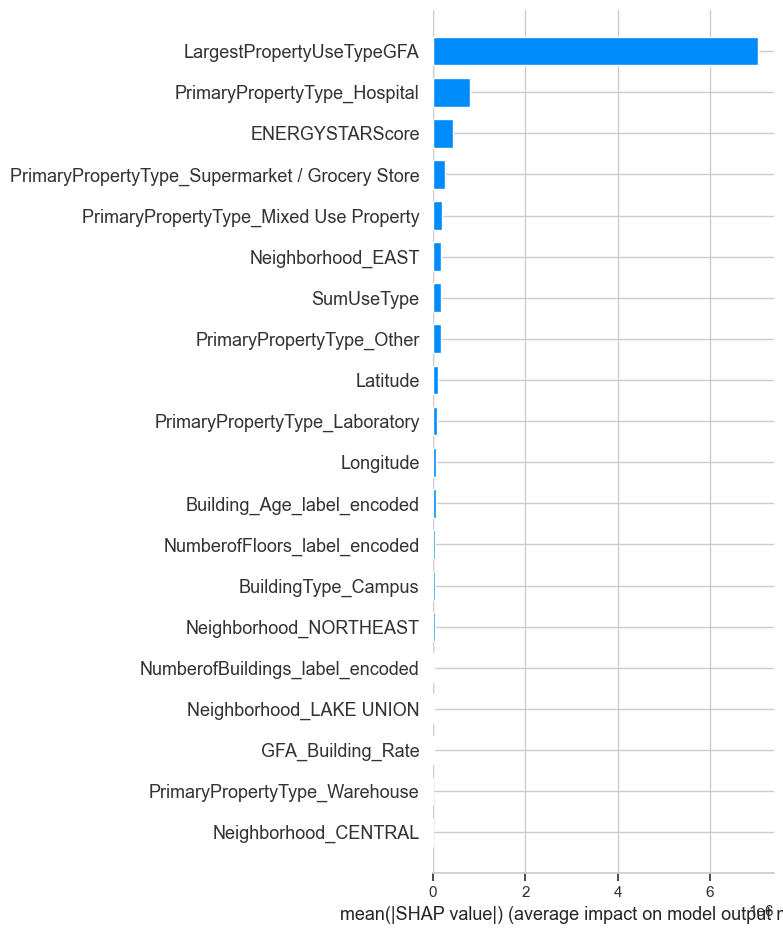

In [110]:
# Vérifiez que X_test est un DataFrame avec des noms de colonnes
X_test = pd.DataFrame(X_test, columns=feature_names)

# Affichez le résumé SHAP avec noms de caractéristiques
shap.summary_plot(shap_values, X_test, plot_type="bar")

#

# Partie 2: Sans la variable "ENERGYSTARScore"

- **Importation des variables**

In [111]:
# on supprime la variable "ENERGYSTARScore"
df_train_without_Energy = remaining_df.drop('ENERGYSTARScore', axis = 1)
df_train_without_Energy.head()

,SiteEnergyUseWN(kBtu),Longitude,Latitude,LargestPropertyUseTypeGFA,GFA_Building_Rate,GFA_Parking_Rate,SumUseType,Building_Age_label_encoded,NumberofFloors_label_encoded,NumberofBuildings_label_encoded,...,PrimaryPropertyType_Small- and Mid-Sized Office,PrimaryPropertyType_Supermarket / Grocery Store,PrimaryPropertyType_University,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship Facility,BuildingType_Campus,BuildingType_NonResidential,BuildingType_Nonresidential COS,BuildingType_Nonresidential WA,BuildingType_SPS-District K-12
0,7456910.0,-122.33799,47.61220,88434.0,1.00,0.00,1,5,4,0,...,False,False,False,False,False,False,True,False,False,False
1,8664479.0,-122.33393,47.61317,83880.0,0.85,0.15,3,0,4,0,...,False,False,False,False,False,False,True,False,False,False
2,73937112.0,-122.33810,47.61393,756493.0,0.79,0.21,1,3,4,0,...,False,False,False,False,False,False,True,False,False,False
3,6946800.5,-122.33664,47.61412,61320.0,1.00,0.00,1,5,4,0,...,False,False,False,False,False,False,True,False,False,False
4,14656503.0,-122.34047,47.61375,123445.0,0.65,0.35,3,2,4,0,...,False,False,False,False,False,False,True,False,False,False


### Extraction des valeurs des données TEST

In [112]:
# Supprimer la variable 'ENERGYSTARScore' du jeu de donnée
df_test_without_Energy = test_df.drop('ENERGYSTARScore', axis = 1)
df_test_without_Energy.head()

,SiteEnergyUseWN(kBtu),Longitude,Latitude,LargestPropertyUseTypeGFA,GFA_Building_Rate,GFA_Parking_Rate,SumUseType,Building_Age_label_encoded,NumberofFloors_label_encoded,NumberofBuildings_label_encoded,...,PrimaryPropertyType_Small- and Mid-Sized Office,PrimaryPropertyType_Supermarket / Grocery Store,PrimaryPropertyType_University,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship Facility,BuildingType_Campus,BuildingType_NonResidential,BuildingType_Nonresidential COS,BuildingType_Nonresidential WA,BuildingType_SPS-District K-12
30,4.716139e+08,-122.31788,47.53493,757027.0,1.0,0.0,5,0,2,0,...,False,False,False,False,False,True,False,False,False,False
777,1.265152e+06,-122.33339,47.59979,27838.0,1.0,0.0,1,6,3,0,...,True,False,False,False,False,False,True,False,False,False
1010,1.815643e+06,-122.35871,47.61833,34030.0,1.0,0.0,1,2,2,0,...,True,False,False,False,False,False,True,False,False,False
578,8.912515e+05,-122.28996,47.67738,22220.0,1.0,0.0,1,4,0,0,...,False,False,False,False,True,False,True,False,False,False
527,3.847930e+06,-122.33864,47.57613,101752.0,1.0,0.0,4,4,0,0,...,False,False,False,True,False,False,True,False,False,False


In [113]:
df_test_without_Energy.shape,df_train_without_Energy.shape

((309, 55), (1238, 55))

### Variables Explicatives et Expliquées
- **Données entrées/Sortie**

In [114]:
train_valid = df_train_without_Energy
# séparation de la variable à expliquer et les variables explicatives
X1 = train_valid[train_valid.columns[1:]] # colonnes excepter la variable à prédire
y1 = train_valid['SiteEnergyUseWN(kBtu)']  # variable cible à prédire
# Données de test
X_test1 = df_test_without_Energy.drop("SiteEnergyUseWN(kBtu)", axis=1)  # Variables explicatives
y_tests1 = df_test_without_Energy["SiteEnergyUseWN(kBtu)"]  # Variable cible

In [115]:
# variables explicatives
X1.head()

,Longitude,Latitude,LargestPropertyUseTypeGFA,GFA_Building_Rate,GFA_Parking_Rate,SumUseType,Building_Age_label_encoded,NumberofFloors_label_encoded,NumberofBuildings_label_encoded,Neighborhood_BALLARD,...,PrimaryPropertyType_Small- and Mid-Sized Office,PrimaryPropertyType_Supermarket / Grocery Store,PrimaryPropertyType_University,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship Facility,BuildingType_Campus,BuildingType_NonResidential,BuildingType_Nonresidential COS,BuildingType_Nonresidential WA,BuildingType_SPS-District K-12
0,-122.33799,47.61220,88434.0,1.00,0.00,1,5,4,0,False,...,False,False,False,False,False,False,True,False,False,False
1,-122.33393,47.61317,83880.0,0.85,0.15,3,0,4,0,False,...,False,False,False,False,False,False,True,False,False,False
2,-122.33810,47.61393,756493.0,0.79,0.21,1,3,4,0,False,...,False,False,False,False,False,False,True,False,False,False
3,-122.33664,47.61412,61320.0,1.00,0.00,1,5,4,0,False,...,False,False,False,False,False,False,True,False,False,False
4,-122.34047,47.61375,123445.0,0.65,0.35,3,2,4,0,False,...,False,False,False,False,False,False,True,False,False,False


In [116]:
# variables à expliquer ou cible
y1.head()

0     7456910.0
1     8664479.0
2    73937112.0
3     6946800.5
4    14656503.0
Name: SiteEnergyUseWN(kBtu), dtype: float64

#### Visualisation de la distribution de X1

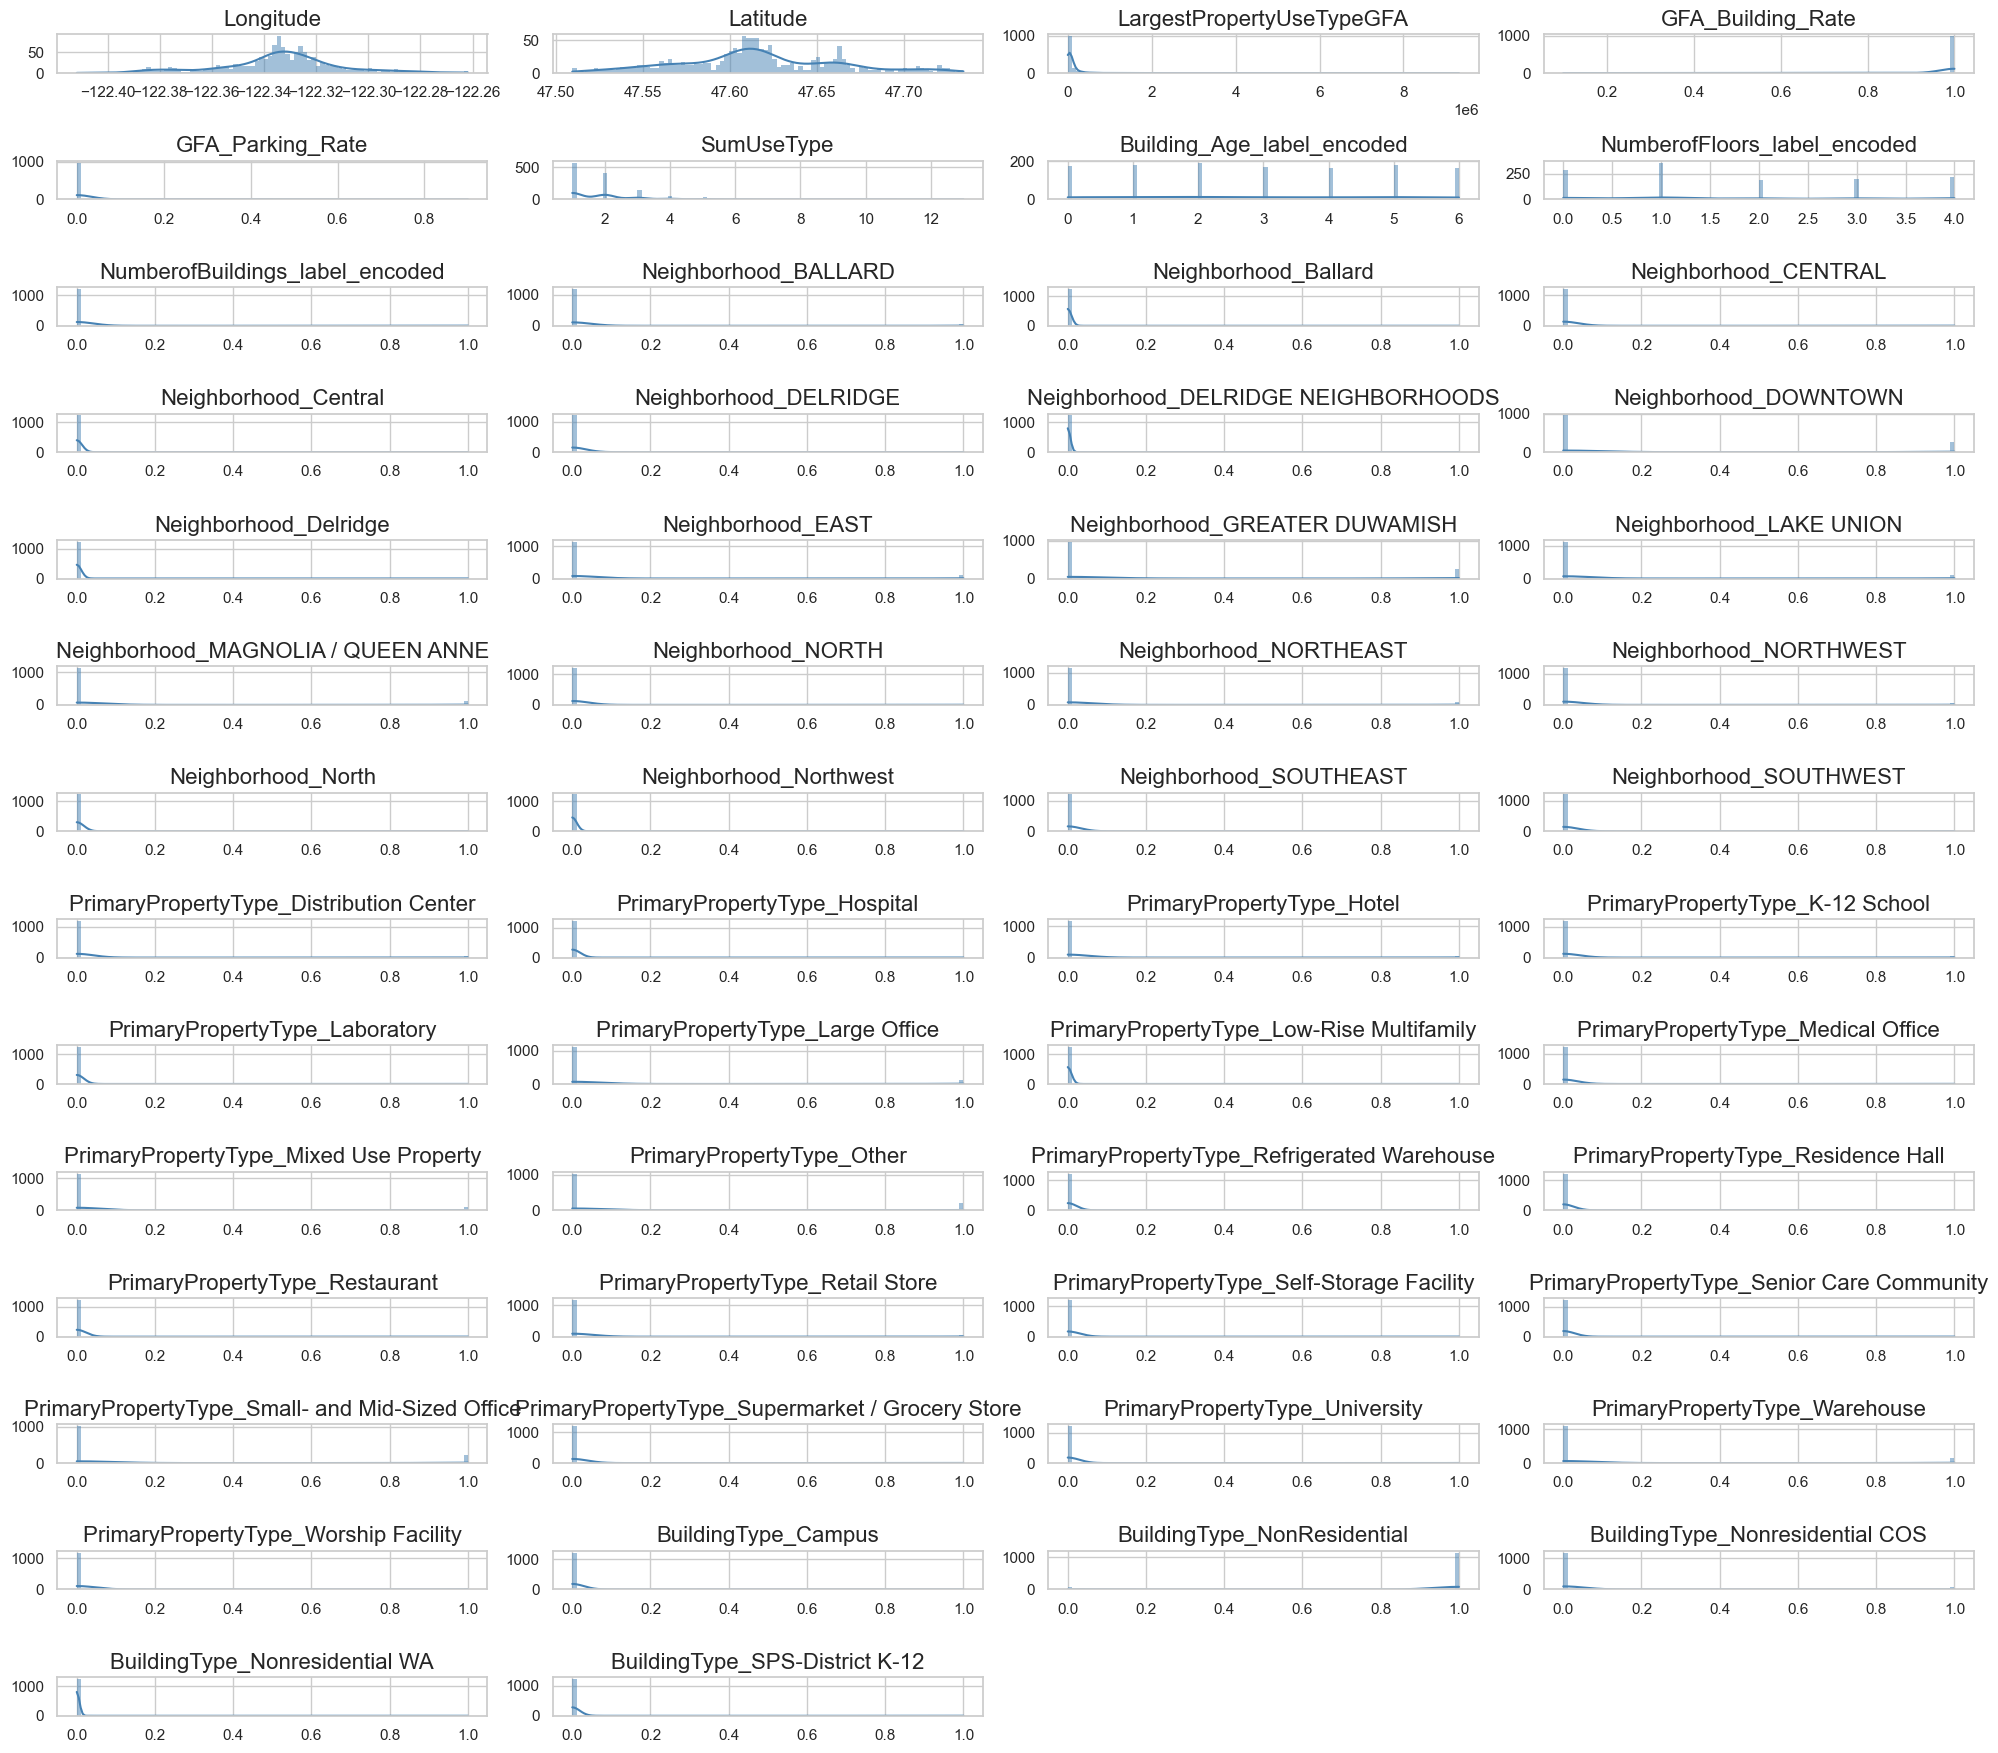

In [117]:
sns.set(style="whitegrid")
fig = plt.figure(figsize=(20, 25))

for feat_idx in range(1, train_valid.shape[1]):  # On parcourt les colonnes à partir de la deuxième colonne
    ax = fig.add_subplot(20, 4, feat_idx)  # Disposition 18 lignes x 4 colonnes
    sns.histplot(train_valid.iloc[:, feat_idx], bins=90, kde=True, color='steelblue', edgecolor='none', ax=ax) 
    ax.set_title(train_valid.columns[feat_idx], fontsize=16)  # Titre du sous-graphique
    ax.set_xlabel('')  # Pas de titre sur l'axe x pour éviter les répétitions
    ax.set_ylabel('') 
plt.tight_layout()
plt.show()

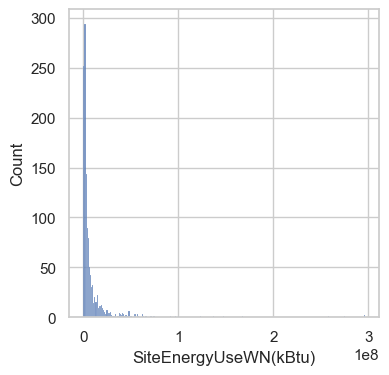

In [118]:
# Distribution de la variable cible
plt.figure(figsize=(4,4))
sns.histplot(data=train_valid, x='SiteEnergyUseWN(kBtu)')
plt.show()

- **Normalisation de données**

In [119]:
scaler = StandardScaler()
X_train1 = scaler.fit_transform(X1)  # Fit et transform sur l'ensemble d'entraînement
X_tests1 = scaler.transform(X_test1)  # Transform uniquement sur test

- **Scindons les données en entrainement et validation**

In [120]:
# division des données: Entrainement et Validation
X_train1, X_check1, y_train1, y_check1 = train_test_split(X_train1, y1, test_size = 0.15, random_state = 42)
print('train_85% set :', X_train1.shape)
print('check_15% set :', X_check1.shape)

train_85% set : (1052, 54)
check_15% set : (186, 54)


###

# **2.1 Modèle Linéaire**

### <span style="color: blue;">***___Modèle Dummy Regressor___*** </span>

Afin d'optimiser les paramèttres du modèle nous utiliserons la   <span style="color: blue;">**Cross Validation**</span>

- **Paramèttres du modèle**

In [121]:
# hyperparamètres
param_dummy = {
                'strategy': ['mean', 'median', 'quantile'], 
                'quantile': [0.25, 0.5, 0.75] 
              }
# train
X_train1_dummy = X_train1
y_train1_dummy = y_train1
# validation
X_check1_dummy = X_check1
y_check1_dummy = y_check1
# test
X_tests1_dummy = X_tests1
y_tests1_dummy = y_tests1

- **Modèle**

In [122]:
# initialisation du modèle
dummy = DummyRegressor()

- **Cross_Validation**

In [123]:
Grid_search = GridSearchCV(dummy, param_grid = param_dummy, cv=5, scoring=['neg_mean_squared_error','r2','neg_mean_absolute_error'], refit='r2')
start_time_dummy1 = timeit.default_timer()
Grid_search.fit(X_train1_dummy, y_train1_dummy)
end_time_dummy1 = timeit.default_timer()
elapsed_dummy1 = end_time_dummy1 - start_time_dummy1

<span style="color: blue;">**Validation_Dummy**</span>

- **Meilleurs Paramètres du modèle**

In [124]:
Best_param_dummy = Grid_search.best_estimator_
y_check1_pred_dummy = Best_param_dummy.predict(X_check1_dummy)

- **Performance du modèle**

In [125]:
from sklearn import metrics

# performance du modèle
dummy_rmse_valid1 = (mean_squared_error(y_check1_dummy, y_check1_pred_dummy))** 0.5 # moyenne de l'erreur quadratique
dummy_r2_valid1 = r2_score(y_check1_dummy, y_check1_pred_dummy) # coefficient de dertermination: taux de variabilité entre les variable
dummy_mae_valid1 = mean_absolute_error(y_check1_dummy, y_check1_pred_dummy) # erreur moyenne absolue

- **Représentation graphique des performances**

Meilleurs paramètres : DummyRegressor(quantile=0.75, strategy='quantile')
RMSE : 13313458.81
R2 : -0.0
MAE : 7767998.66
time_dummy1 : 0.12


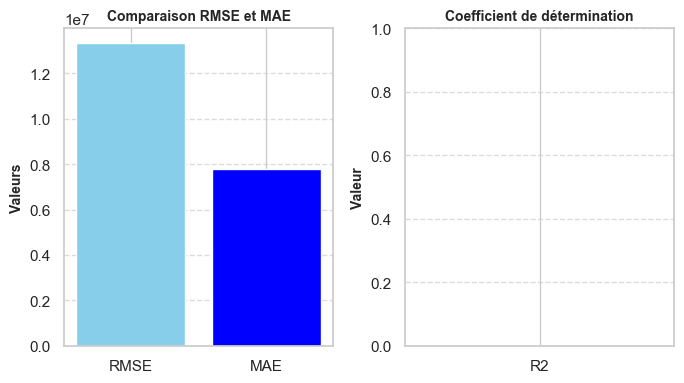

In [126]:
# Affichage des résultats
print('Meilleurs paramètres :', Best_param_dummy)
print('RMSE :', round(dummy_rmse_valid1,2))
print('R2 :', round(dummy_r2_valid1,2))
print('MAE :', round(dummy_mae_valid1,2))
print('time_dummy1 :', round(elapsed_dummy1,2))

# Visualisation des paramètres RMSE, MAE, R2
fig, axes = plt.subplots(ncols=2, figsize=(7, 4))

# 1. Graphique pour RMSE et MAE
metrics = ['RMSE', 'MAE']
values = [dummy_rmse_valid1, dummy_mae_valid1]
axes[0].bar(metrics, values, color=['Skyblue', 'blue'])
axes[0].set_title('Comparaison RMSE et MAE', fontsize=10, fontweight = 'bold')
axes[0].set_ylabel('Valeurs', fontsize=10, fontweight = 'bold')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# 2. Graphique pour R2
axes[1].bar(['R2'], [dummy_r2_valid1], color='green') # coefficient de détermination commpris entre 0 et 1
axes[1].set_title('Coefficient de détermination', fontsize=10, fontweight = 'bold')
axes[1].set_ylabel('Valeur', fontsize=10, fontweight = 'bold')
axes[1].set_ylim(0, 1)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

- **Droite de regression( valeurs réelles/ valeurs predictes)**

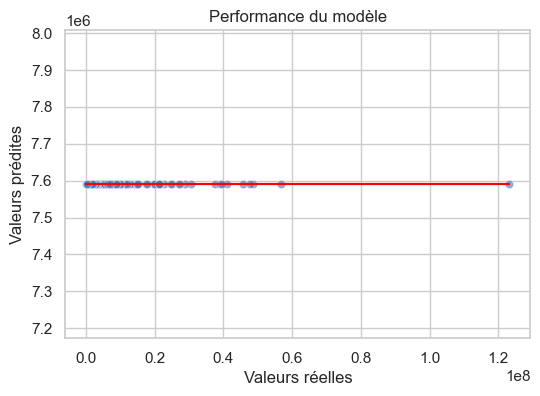

In [127]:
# Créer un graphique de nuage de points
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_check1_dummy, y= y_check1_pred_dummy, alpha=0.6)
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.title('Performance du modèle')

# Calculer et tracer la droite de régression
m, b = np.polyfit(y_check1_dummy, y_check1_pred_dummy, 1)
plt.plot(y_check1_dummy, m*y_check1_dummy + b, color='red')  # droite de régression

plt.show()

- **Graphes des résidus**

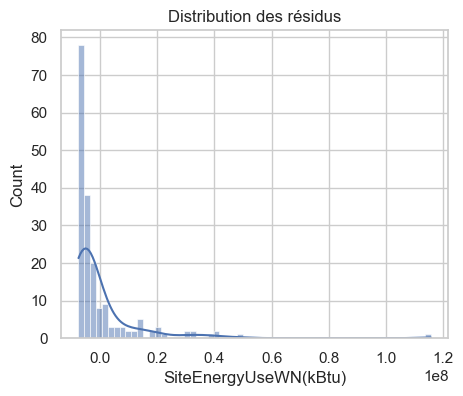

In [128]:
plt.figure(figsize = (5, 4))
residus = y_check1_dummy - y_check1_pred_dummy 
sns.histplot(residus, kde=True)
plt.title("Distribution des résidus")
plt.show()

<span style="color: blue;">**TEST_Dummy**</span>

- **Meilleurs Paramètres du modèle**

In [129]:
Best_param_dummy = Grid_search.best_estimator_
y_tests1_pred_dummy = Best_param_dummy.predict(X_tests1_dummy)

- **Performance du modèle**

In [130]:
from sklearn import metrics
# performance du modèle
dummy_rmse_test1 = (mean_squared_error(y_tests1_dummy, y_tests1_pred_dummy))** 0.5 # moyenne de l'erreur quadratique
dummy_r2_test1 = r2_score(y_tests1_dummy, y_tests1_pred_dummy) # coefficient de dertermination: taux de variabilité entre les variable
dummy_mae_test1 = mean_absolute_error(y_tests1_dummy, y_tests1_pred_dummy) # erreur moyenne absolue

- **Représentation graphique des performances**

RMSE : 28925121.88
R2 : -0.0
MAE : 8526001.51


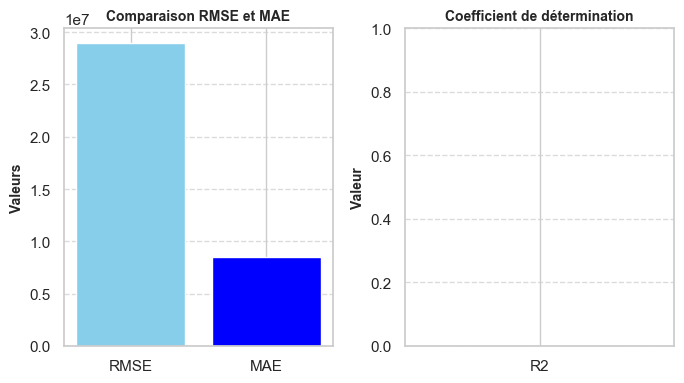

In [131]:
# Affichage des résultats
print('RMSE :', round(dummy_rmse_test1,2))
print('R2 :', round(dummy_r2_test1,2))
print('MAE :', round(dummy_mae_test1,2))

# Visualisation des paramètres RMSE, MAE, R2
fig, axes = plt.subplots(ncols=2, figsize=(7, 4))

# 1. Graphique pour RMSE et MAE
metrics = ['RMSE', 'MAE']
values = [dummy_rmse_test1, dummy_mae_test1]
axes[0].bar(metrics, values, color=['Skyblue', 'blue'])
axes[0].set_title('Comparaison RMSE et MAE', fontsize=10, fontweight = 'bold')
axes[0].set_ylabel('Valeurs', fontsize=10, fontweight = 'bold')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# 2. Graphique pour R2
axes[1].bar(['R2'], [dummy_r2_test1], color='green') # coefficient de détermination commpris entre 0 et 1
axes[1].set_title('Coefficient de détermination', fontsize=10, fontweight = 'bold')
axes[1].set_ylabel('Valeur', fontsize=10, fontweight = 'bold')
axes[1].set_ylim(0, 1)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

- **Droite de regression( valeurs réelles/ valeurs predictes)**

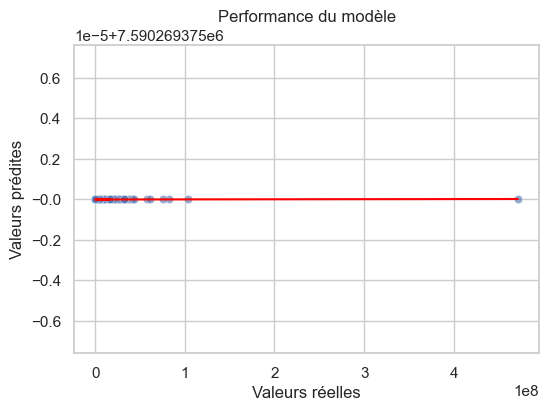

In [132]:
# Créer un graphique de nuage de points
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_tests1_dummy, y=y_tests1_pred_dummy, alpha=0.6)
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.title('Performance du modèle')

# Calculer et tracer la droite de régression
m, b = np.polyfit(y_tests1_dummy, y_tests1_pred_dummy, 1)
plt.plot(y_tests1_dummy, m*y_tests1_dummy + b, color='red')  # droite de régression

plt.show()

- **Représentation graphique des résidus**

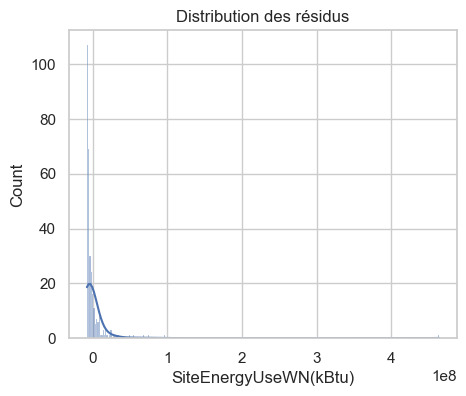

In [133]:
plt.figure(figsize = (5, 4))
residus = y_tests1_dummy - y_tests1_pred_dummy  
sns.histplot(residus, kde=True)
plt.title("Distribution des résidus")
plt.show()

######

 ##  <span style="color: green;">***___Modèle ElasticNet___***</span>


####  En utilisant la "**validation croisée**" et la méthode "**GridsearchCV**"

In [134]:
# Définir le modèle ElasticNet
elastic_net = ElasticNet()

- **Hyperparamètres Paramètres**

In [135]:
# Définir la grille de paramètres à tester

param_elasticNet = {
                    'alpha': [0.1, 1 ,10],
                    'l1_ratio': [0.5] 
                   } 

# train
X_train1_elasticNet = X_train1
y_train1_elasticNet = y_train1
# validation
X_check1_elasticNet = X_check1
y_check1_elasticNet = y_check1
# test
X_tests1_elasticNet = X_tests1
y_tests1_elasticNet = y_tests1    

- **Configuration du modèle GridsearchCV**

In [136]:
# time
start_time_elasticNet1 = timeit.default_timer()
# Configurer GridSearchCV
Grid_search = GridSearchCV(estimator=elastic_net, param_grid = param_elasticNet, cv = 42, scoring='neg_mean_squared_error')
# Exécuter GridSearchCV
Grid_search.fit(X_train1_elasticNet, y_train1_elasticNet)
end_time1 = timeit.default_timer()
elapsed_elasticNet1 = end_time1 - start_time_elasticNet1

### <span style="color: green;">**Validation_ElasticNet**</span>

- **Prédiction de la variable**

In [137]:
# Prédiction sur l'ensemble de test
y_check1_pred_elasticNet = Grid_search.predict(X_check1_elasticNet)

- **Performance du modèle**

In [138]:
from sklearn import metrics
# Calcul de la RMSE sur l'ensemble de test
elasticNet_rmse_valide1 = (mean_squared_error(y_check1_elasticNet, y_check1_pred_elasticNet))** 0.5
elasticNet_r2_valide1 = r2_score(y_check1_elasticNet, y_check1_pred_elasticNet)
elasticNet_mae_valide1 = mean_absolute_error(y_check1_elasticNet, y_check1_pred_elasticNet)

- **Représentation graphique des performances**

RMSE : 10513101.69
R2 : 0.38
MAE : 5468512.2
time_elasticNet1 : 0.57


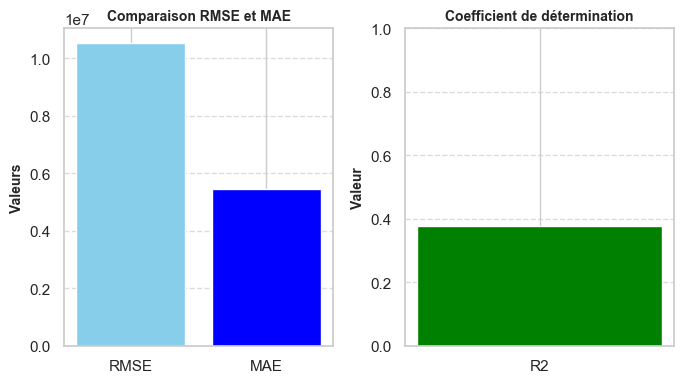

In [139]:
# Affichage des résultats
print('RMSE :', round(elasticNet_rmse_valide1,2))
print('R2 :', round(elasticNet_r2_valide1,2))
print('MAE :', round(elasticNet_mae_valide1,2))
print('time_elasticNet1 :', round(elapsed_elasticNet1,2))

# Visualisation des paramètres RMSE, MAE, R2
fig, axes = plt.subplots(ncols=2, figsize=(7, 4))

# 1. Graphique pour RMSE et MAE
metrics = ['RMSE', 'MAE']
values = [elasticNet_rmse_valide1, elasticNet_mae_valide1]
axes[0].bar(metrics, values, color=['Skyblue', 'blue'])
axes[0].set_title('Comparaison RMSE et MAE', fontsize=10, fontweight = 'bold')
axes[0].set_ylabel('Valeurs', fontsize=10, fontweight = 'bold')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# 2. Graphique pour R2
axes[1].bar(['R2'], [elasticNet_r2_valide1], color='green') # coefficient de détermination commpris entre 0 et 1
axes[1].set_title('Coefficient de détermination', fontsize=10, fontweight = 'bold')
axes[1].set_ylabel('Valeur', fontsize=10, fontweight = 'bold')
axes[1].set_ylim(0, 1)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

- **droite de regression**

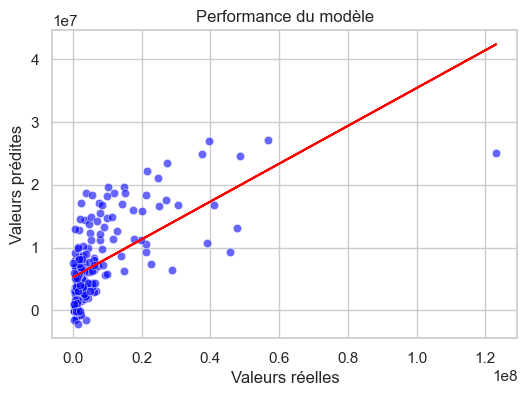

In [140]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_check1_elasticNet, y=y_check1_pred_elasticNet, alpha=0.6, color='blue')
plt.xlabel('Valeurs réelles')  
plt.ylabel('Valeurs prédites')
plt.title('Performance du modèle')

# Calculer et tracer la droite de régression
m, b = np.polyfit(y_check1_elasticNet, y_check1_pred_elasticNet, 1)
plt.plot(y_check1_elasticNet, m*y_check1_elasticNet + b, color='red')  # droite de régression
plt.show()

- **Graphe de résidus**

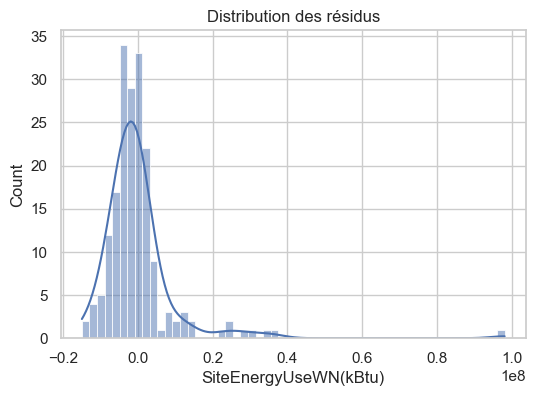

In [141]:
# graphe de résidus
plt.figure(figsize=(6,4))
residus = y_check1_elasticNet - y_check1_pred_elasticNet
sns.histplot(residus, kde=True)
plt.title("Distribution des résidus")
plt.show()

### <span style="color: green;">**TEST_ElasticNet**</span>

- **Prédiction de la variable**

In [142]:
# Prédiction sur l'ensemble de test
y_tests1_pred_elasticNet = Grid_search.predict(X_tests1_elasticNet)

- **Performance du modèle**

In [143]:
from sklearn import metrics
# Calcul de la RMSE sur l'ensemble de test
elasticNet_rmse_test1 = (mean_squared_error(y_tests1_elasticNet, y_tests1_pred_elasticNet))** 0.5
elasticNet_r2_test1 = r2_score(y_tests1_elasticNet, y_tests1_pred_elasticNet)
elasticNet_mae_test1 = mean_absolute_error(y_tests1_elasticNet, y_tests1_pred_elasticNet)

- **Représentation graphique des performances**

RMSE : 27545173.63
R2 : 0.09
MAE : 6989245.96


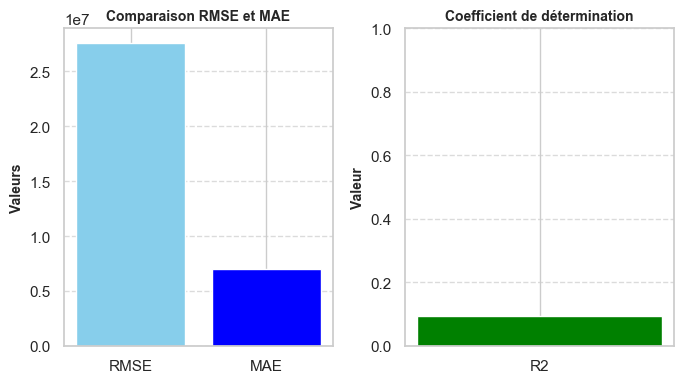

In [144]:
# Affichage des résultats
print('RMSE :', round(elasticNet_rmse_test1,2))
print('R2 :', round(elasticNet_r2_test1,2))
print('MAE :', round(elasticNet_mae_test1,2))

# Visualisation des paramètres RMSE, MAE, R2
fig, axes = plt.subplots(ncols=2, figsize=(7, 4))

# 1. Graphique pour RMSE et MAE
metrics = ['RMSE', 'MAE']
values = [elasticNet_rmse_test1, elasticNet_mae_test1]
axes[0].bar(metrics, values, color=['Skyblue', 'blue'])
axes[0].set_title('Comparaison RMSE et MAE', fontsize=10, fontweight = 'bold')
axes[0].set_ylabel('Valeurs', fontsize=10, fontweight = 'bold')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# 2. Graphique pour R2
axes[1].bar(['R2'], [elasticNet_r2_test1], color='green') # coefficient de détermination commpris entre 0 et 1
axes[1].set_title('Coefficient de détermination', fontsize=10, fontweight = 'bold')
axes[1].set_ylabel('Valeur', fontsize=10, fontweight = 'bold')
axes[1].set_ylim(0, 1)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

- **Droite de regression**

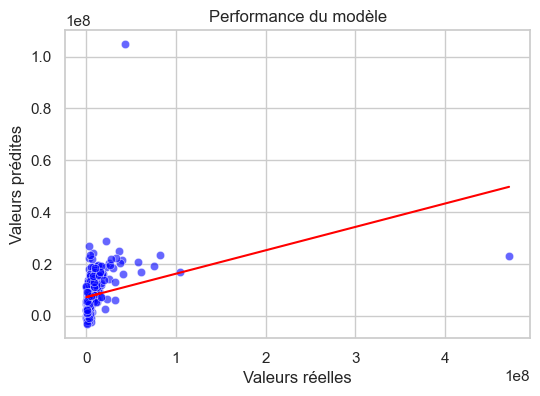

In [145]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_tests1_elasticNet, y=y_tests1_pred_elasticNet, alpha=0.6, color='blue')
plt.xlabel('Valeurs réelles')  
plt.ylabel('Valeurs prédites')
plt.title('Performance du modèle')

# Calculer et tracer la droite de régression
m, b = np.polyfit(y_tests1_elasticNet, y_tests1_pred_elasticNet, 1)
plt.plot(y_tests1_elasticNet, m*y_tests1_elasticNet + b, color='red')  # droite de régression
plt.show()

- **Représentation graphique des résidus**

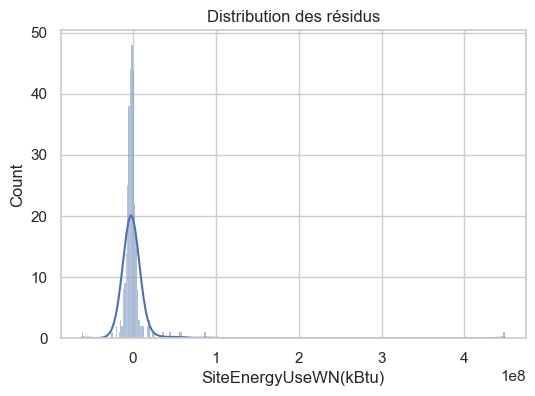

In [146]:
# graphe de résidus
plt.figure(figsize=(6,4))
residus = y_tests1_elasticNet - y_tests1_pred_elasticNet
sns.histplot(residus, kde=True)
plt.title("Distribution des résidus")
plt.show()

#####

## **2.2- Modèle Non-Linéaire**

####  <span style="color: blue;">***___Modèle Ridge à noyau___***</span>

- **Paramètres du modèles**

In [147]:
predicteur = kernel_ridge.KernelRidge( alpha = 1.0,  # valeur par défaut 
                                       kernel ='rbf', # noyau Gaussien
                                       gamma = 0.01 )   # valeur de 1/(2 * sigma**2)

# train
X_train1_kernelRidge = X_train1
y_train1_kernelRidge = y_train1
# validation
X_check1_kernelRidge = X_check1
y_check1_kernelRidge = y_check1
# test
X_tests1_kernelRidge = X_tests1
y_tests1_kernelRidge = y_tests1  

### <span style="color: blue;">**Validation_kernelRidge**</span>

- **Prédiction**

In [148]:
# time
start_time_ridge1 = timeit.default_timer()
# entraîner le classifieur sur le jeu d'entrainement
predicteur.fit(X_train1_kernelRidge, y_train1_kernelRidge)
end_time1 = timeit.default_timer()
elapsed_kernelridge1 = end_time1 - start_time_ridge1
# prédire sur le jeu de test
y_check1_pred_kernelRidge = predicteur.predict(X_check1_kernelRidge)

- **Performance du modèle**

In [149]:
from sklearn import metrics
# calcul des métriques sur le jeu de test
kernelridge_rmse_valide1 = (metrics.mean_squared_error(y_check1_kernelRidge, y_check1_pred_kernelRidge))** 0.5
kernelridge_mae_valide1 = metrics.mean_absolute_error(y_check1_kernelRidge, y_check1_pred_kernelRidge)
kernelridge_r2_valide1 = metrics.r2_score(y_check1_kernelRidge, y_check1_pred_kernelRidge)

- **Résultat Graphique**

Meilleurs paramètres : {'alpha': 1, 'l1_ratio': 0.5}
RMSE : 8383265.9
R2 : 0.6
MAE : 4141243.64
time_kernelRidge: 0.07


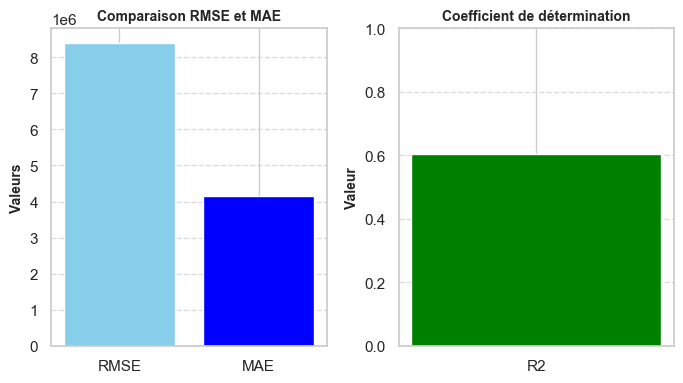

In [150]:
# Affichage des résultats
print('Meilleurs paramètres :', Grid_search.best_params_)
print('RMSE :', round(kernelridge_rmse_valide1,2))
print('R2 :', round(kernelridge_r2_valide1,2))
print('MAE :', round(kernelridge_mae_valide1,2))
print("time_kernelRidge: {:.2f}".format(elapsed_kernelridge1))

# Visualisation des paramètres RMSE, MAE, R2
fig, axes = plt.subplots(ncols=2, figsize=(7, 4))

# 1. Graphique pour RMSE et MAE
metrics = ['RMSE', 'MAE']
values = [kernelridge_rmse_valide1, kernelridge_mae_valide1]
axes[0].bar(metrics, values, color=['Skyblue', 'blue'])
axes[0].set_title('Comparaison RMSE et MAE', fontsize=10, fontweight = 'bold')
axes[0].set_ylabel('Valeurs', fontsize=10, fontweight = 'bold')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# 2. Graphique pour R2
axes[1].bar(['R2'], [kernelridge_r2_valide1], color='green') # coefficient de détermination commpris entre 0 et 1
axes[1].set_title('Coefficient de détermination', fontsize=10, fontweight = 'bold')
axes[1].set_ylabel('Valeur', fontsize=10, fontweight = 'bold')
axes[1].set_ylim(0, 1)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

- **Prédiction sur les valeurs réelles**

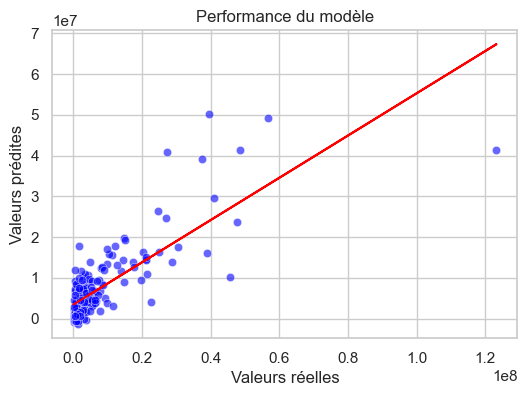

In [151]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_check1_kernelRidge, y=y_check1_pred_kernelRidge, alpha=0.6, color='blue')
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.title('Performance du modèle')
                                                
# Calculer et tracer la droite de régression
m, b = np.polyfit(y_check1_kernelRidge, y_check1_pred_kernelRidge, 1)
plt.plot(y_check1_kernelRidge, m*y_check1_kernelRidge + b, color='red')  # droite de régression
plt.show()

- **Graphe de Résidus**

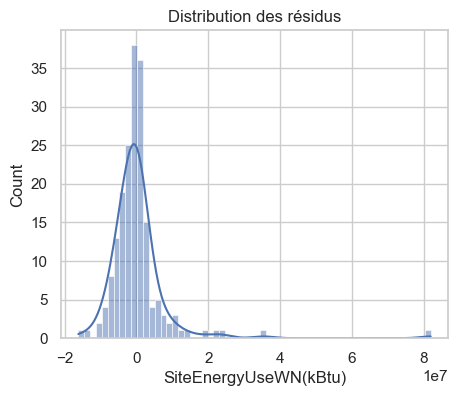

In [152]:
# résidus
plt.figure(figsize=(5,4))
residus = y_check1_kernelRidge - y_check1_pred_kernelRidge
sns.histplot(residus, kde=True)
plt.title("Distribution des résidus")
plt.show()

### <span style="color: blue;">**TEST_kernelRidge**</span>

- **Prédiction**

In [153]:
# prédire sur le jeu de test
y_tests1_pred_kernelRidge = predicteur.predict(X_tests1_kernelRidge)

- **Performance du modèle**

In [154]:
from sklearn import metrics
# calcul des métriques sur le jeu de test
kernelridge_rmse_tests1 = np.sqrt(metrics.mean_squared_error(y_tests1_kernelRidge, y_tests1_pred_kernelRidge))
kernelridge_mae_tests1 = metrics.mean_absolute_error(y_tests1_kernelRidge, y_tests1_pred_kernelRidge)
kernelridge_r2_tests1 = metrics.r2_score(y_tests1_kernelRidge, y_tests1_pred_kernelRidge)

- **Résultat Graphique**

Meilleurs paramètres : {'alpha': 1, 'l1_ratio': 0.5}
RMSE : 25862255.87
R2 : 0.2
MAE : 5624438.27


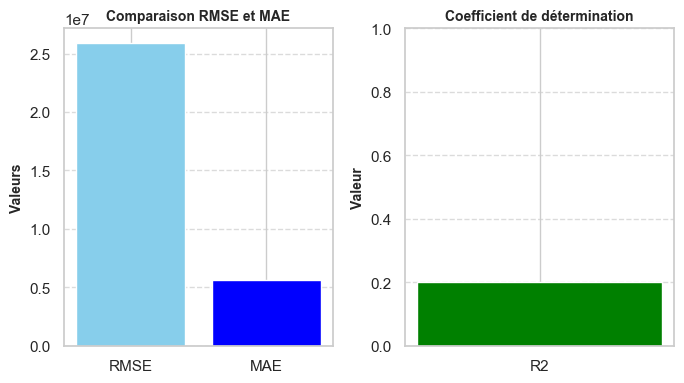

In [155]:
# Affichage des résultats
print('Meilleurs paramètres :', Grid_search.best_params_)
print('RMSE :', round(kernelridge_rmse_tests1,2))
print('R2 :', round(kernelridge_r2_tests1,2))
print('MAE :', round(kernelridge_mae_tests1,2))

# Visualisation des paramètres RMSE, MAE, R2
fig, axes = plt.subplots(ncols=2, figsize=(7, 4))

# 1. Graphique pour RMSE et MAE
metrics = ['RMSE', 'MAE']
values = [kernelridge_rmse_tests1, kernelridge_mae_tests1]
axes[0].bar(metrics, values, color=['Skyblue', 'blue'])
axes[0].set_title('Comparaison RMSE et MAE', fontsize=10, fontweight = 'bold')
axes[0].set_ylabel('Valeurs', fontsize=10, fontweight = 'bold')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# 2. Graphique pour R2
axes[1].bar(['R2'], [kernelridge_r2_tests1], color='green') # coefficient de détermination commpris entre 0 et 1
axes[1].set_title('Coefficient de détermination', fontsize=10, fontweight = 'bold')
axes[1].set_ylabel('Valeur', fontsize=10, fontweight = 'bold')
axes[1].set_ylim(0, 1)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

- **Prédiction sur les valeurs réelles**

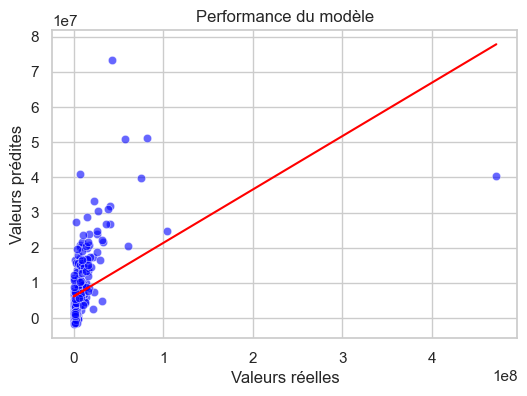

In [156]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_tests1_kernelRidge, y=y_tests1_pred_kernelRidge, alpha=0.6, color='blue')
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.title('Performance du modèle')

# Calculer et tracer la droite de régression
m, b = np.polyfit(y_tests1_kernelRidge, y_tests1_pred_kernelRidge, 1)
plt.plot(y_tests1_kernelRidge, m*y_tests1_kernelRidge + b, color='red')  # droite de régression
plt.show()

- **Graphe de Résidus**

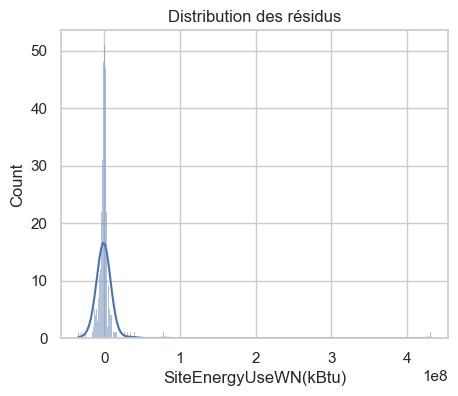

In [157]:
# résidus
plt.figure(figsize=(5,4))
residus = y_tests1_kernelRidge - y_tests1_pred_kernelRidge
sns.histplot(residus, kde=True)
plt.title("Distribution des résidus")
plt.show()

#####

###  <span style="color: blue;">***___Modèle Gradient Boosting___***</span>

- **paramètres**

In [158]:
params_GB = {
                'n_estimators': [50, 100, 200],
                'learning_rate': [0.01, 0.1, 0.5],
                'max_depth': [3, 5, 7]
            }

# train
X_train1_GB = X_train1
y_train1_GB = y_train1
# validation
X_check1_GB = X_check1
y_check1_GB = y_check1
# test
X_tests1_GB = X_tests1
y_tests1_GB = y_tests1  

In [159]:
# modèle de Gradient Boosting
Gradient_Boosting_reg = GradientBoostingRegressor(n_estimators = 100, learning_rate=0.1, max_depth=3, random_state = 5 )

- **Recherche des hyperparamètres**

In [160]:
# Meilleurs hyperparamètres
grid_search = GridSearchCV(Gradient_Boosting_reg, params_GB, cv=5, scoring='neg_mean_squared_error')
# time
start_time_GB1 = timeit.default_timer()
grid_search.fit(X_train1_GB, y_train1_GB)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=5),
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [161]:
# Affichage des meilleurs paramètres et du meilleur score
print("Meilleurs paramètres : ", grid_search.best_params_)
print("Meilleur score : ", -grid_search.best_score_)

Meilleurs paramètres :  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Meilleur score :  161295320490933.62


- **Nouveaux paramètres**

In [162]:
# Entraînement du modèle 
best_Gradient_Boosting = GradientBoostingRegressor(**grid_search.best_params_)
best_Gradient_Boosting.fit(X_train1_GB, y_train1_GB)
end_time_GB1 = timeit.default_timer()
elapsed_GB1 = end_time_GB1 - start_time_GB1

###  <span style="color: red;">**Validation_GB**</span>

- **Prédiction**

In [163]:
# Prédiction
y_check1_pred_GB = best_Gradient_Boosting.predict(X_check1_GB)

- **Performance du Modèle**

In [164]:
from sklearn import metrics
# Calcul des métriques
GB_rmse_valide1 = (mean_squared_error(y_check1_GB, y_check1_pred_GB))** 0.5
GB_r2_valide1 = r2_score(y_check1_GB, y_check1_pred_GB)
GB_mae_valide1 = mean_absolute_error(y_check1_GB, y_check1_pred_GB)

- **Résultat graphique**

Meilleurs paramètres : {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
RMSE : 12370038.83
R2 : 0.14
MAE : 3731998.63
time_GB: 69.38


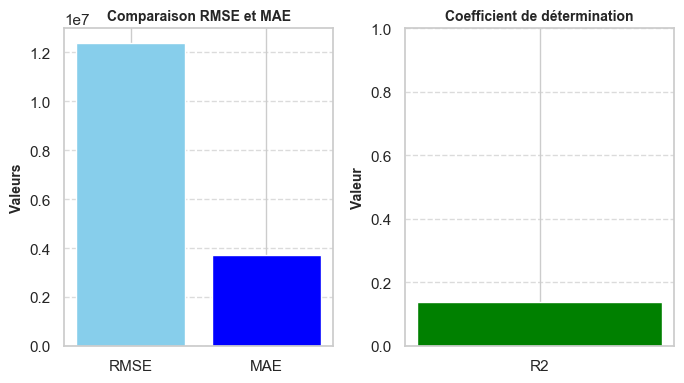

In [165]:
# Affichage des résultats
print('Meilleurs paramètres :', grid_search.best_params_)
print('RMSE :', round(GB_rmse_valide1,2))
print('R2 :', round(GB_r2_valide1,2))
print('MAE :', round(GB_mae_valide1,2))
print("time_GB: {:.2f}".format(elapsed_GB1))

# Visualisation des paramètres RMSE, MAE, R2
fig, axes = plt.subplots(ncols=2, figsize=(7, 4))

# 1. Graphique pour RMSE et MAE
metrics = ['RMSE', 'MAE']
values = [GB_rmse_valide1, GB_mae_valide1]
axes[0].bar(metrics, values, color=['Skyblue', 'blue'])
axes[0].set_title('Comparaison RMSE et MAE', fontsize=10, fontweight = 'bold')
axes[0].set_ylabel('Valeurs', fontsize=10, fontweight = 'bold')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# 2. Graphique pour R2
axes[1].bar(['R2'], [GB_r2_valide1], color='green') # coefficient de détermination commpris entre 0 et 1
axes[1].set_title('Coefficient de détermination', fontsize=10, fontweight = 'bold')
axes[1].set_ylabel('Valeur', fontsize=10, fontweight = 'bold')
axes[1].set_ylim(0, 1)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

- **droite de regression**

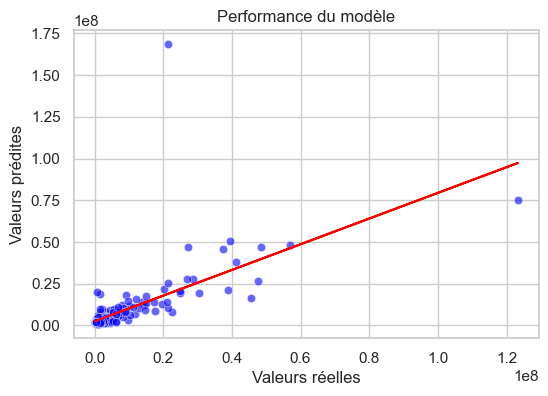

In [166]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_check1_GB, y=y_check1_pred_GB, alpha=0.6, color='blue')
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.title('Performance du modèle')  

# Calculons  et tracons la droite de régression
m, b = np.polyfit(y_check1_GB, y_check1_pred_GB, 1)
plt.plot(y_check1_GB, m*y_check1_GB + b, color='red')  # droite de régression
plt.show()

- **Graphe de résidus**

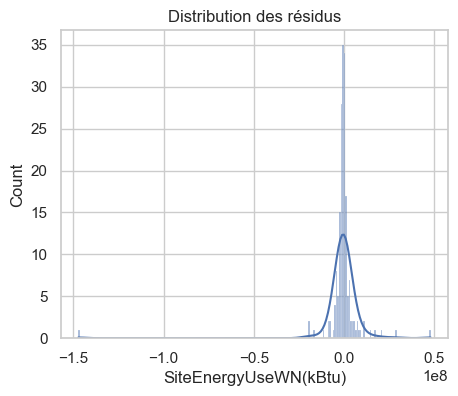

In [167]:
# résidus
plt.figure(figsize=(5,4))
residus = y_check1_GB - y_check1_pred_GB  
sns.histplot(residus, kde=True)
plt.title("Distribution des résidus")
plt.show()

###  <span style="color: red;">**TEST_GB**</span>

- **Prédiction**

In [168]:
# Prédiction
y_tests1_pred_GB = best_Gradient_Boosting.predict(X_tests1_GB)

- **Performance du Modèle**

In [169]:
from sklearn import metrics
# Calcul des métriques
GB_rmse_tests1 = (mean_squared_error(y_tests1_GB, y_tests1_pred_GB))** 0.5
GB_r2_tests1 = r2_score(y_tests1_GB, y_tests1_pred_GB)
GB_mae_tests1 = mean_absolute_error(y_tests1_GB, y_tests1_pred_GB)

- **Représentation Graphique des performances**

RMSE : 26331932.57
R2 : 0.17
MAE : 5455119.61


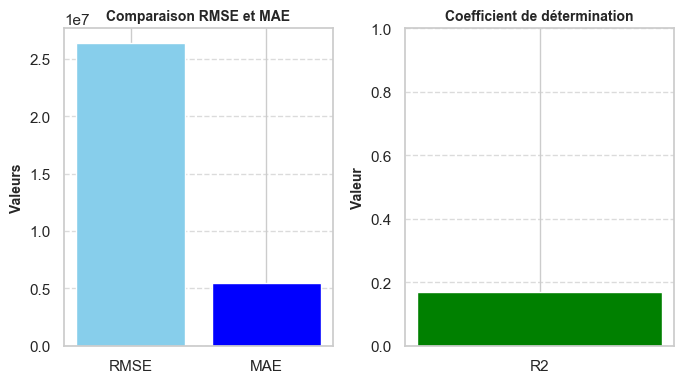

In [170]:
# Affichage des résultats
print('RMSE :', round(GB_rmse_tests1,2))
print('R2 :', round(GB_r2_tests1,2))
print('MAE :', round(GB_mae_tests1,2))

# Visualisation des paramètres RMSE, MAE, R2
fig, axes = plt.subplots(ncols=2, figsize=(7, 4))

# 1. Graphique pour RMSE et MAE
metrics = ['RMSE', 'MAE']
values = [GB_rmse_tests1, GB_mae_tests1]
axes[0].bar(metrics, values, color=['Skyblue', 'blue'])
axes[0].set_title('Comparaison RMSE et MAE', fontsize=10, fontweight = 'bold')
axes[0].set_ylabel('Valeurs', fontsize=10, fontweight = 'bold')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# 2. Graphique pour R2
axes[1].bar(['R2'], [GB_r2_tests1], color='green') # coefficient de détermination commpris entre 0 et 1
axes[1].set_title('Coefficient de détermination', fontsize=10, fontweight = 'bold')
axes[1].set_ylabel('Valeur', fontsize=10, fontweight = 'bold')
axes[1].set_ylim(0, 1)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

- **Droite de regression**

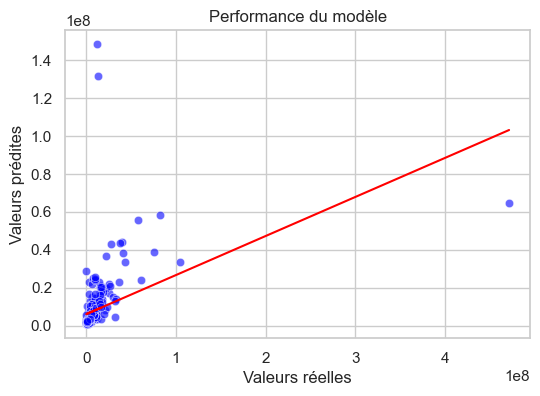

In [171]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_tests1_GB, y=y_tests1_pred_GB, alpha=0.6, color='blue')
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.title('Performance du modèle')  

# Calculons  et tracons la droite de régression
m, b = np.polyfit(y_tests1_GB, y_tests1_pred_GB, 1)
plt.plot(y_tests1_GB, m*y_tests1_GB + b, color='red')  # droite de régression
plt.show()

- **Graphe de Résidus**

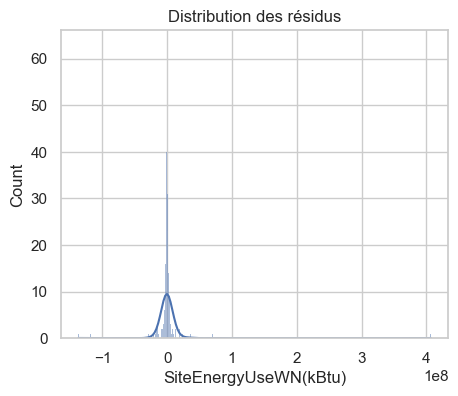

In [172]:
# résidus
plt.figure(figsize=(5,4))
residus = y_tests1_GB - y_tests1_pred_GB    
sns.histplot(residus, kde=True)
plt.title("Distribution des résidus")
plt.show()

#####

## <span style="color: blue;">***___Random Forest Regressor___***</span>

- **Initialisation du modèle**

In [173]:
# Initialiser le modèle
rand_forest = RandomForestRegressor()

- **Paramètres du modèles**

In [174]:
rand_param = {
                "n_estimators": [50, 100, 150],
                "max_depth": [None, 5, 10],
                "min_samples_split": [2, 5],
                "min_samples_leaf": [1, 2]
            }
# train
X_train1_rf = X_train1
y_train1_rf = y_train1
# validation
X_check1_rf = X_check1
y_check1_rf = y_check1
# test
X_tests1_rf = X_tests1
y_tests1_rf = y_tests1  

- **Entrainement avec les nouveaux paramètres**

In [175]:
rand_search = GridSearchCV(rand_forest, rand_param, cv=5, scoring="neg_mean_squared_error")
# start time
start_time_rf1 = timeit.default_timer()
rand_search.fit(X_train1_rf, y_train1_rf)
end_time_rf1 = timeit.default_timer()
elapsed_rf1 = end_time_rf1 - start_time_rf1

- **Meilleurs hyperparamètres**

In [176]:
# Obtenir les meilleurs hyperparamètres et le meilleur modèle
best_param = rand_search.best_params_
print(best_param)
best_model0 = rand_search.best_estimator_
print(best_model0)

{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}
RandomForestRegressor(max_depth=10, min_samples_leaf=2, n_estimators=150)


### <span style="color: brown;">***___Validation_rf___***</span>

- **Prédiction**

In [177]:
# variable prédictive
y_check1_pred_rf = best_model0.predict(X_check1_rf)

- **Performance du modèle**

In [178]:
from sklearn import metrics

# Calculons  la RMSE,r2,mae
rf_rmse_valide1 = (mean_squared_error(y_check1_rf, y_check1_pred_rf))** 0.5
rf_r2_valide1 = r2_score(y_check1_rf, y_check1_pred_rf)
rf_mae_valide1 = mean_absolute_error(y_check1_rf, y_check1_pred_rf)

- **Résultats Graphique**

Meilleurs paramètres : RandomForestRegressor(max_depth=10, min_samples_leaf=2, n_estimators=150)
RMSE : 5834798.05
R2 : 0.81
MAE : 3125183.74
time_GB: 119.85


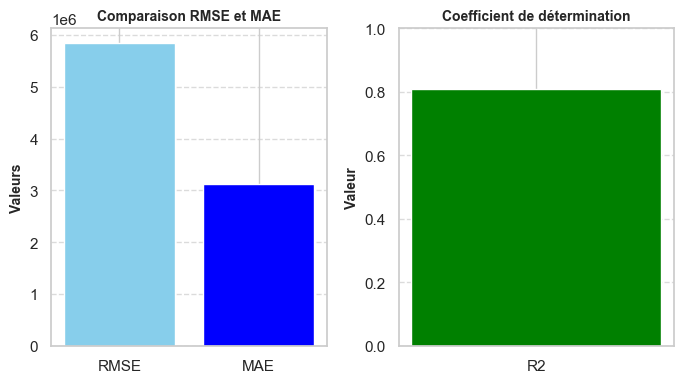

In [179]:
# Affichage des résultats
print('Meilleurs paramètres :', best_model0)
print('RMSE :', round(rf_rmse_valide1,2))
print('R2 :', round(rf_r2_valide1,2))
print('MAE :', round(rf_mae_valide1,2))
print("time_GB: {:.2f}".format(elapsed_rf1))

# Visualisation des paramètres RMSE, MAE, R2
fig, axes = plt.subplots(ncols=2, figsize=(7, 4))

# 1. Graphique pour RMSE et MAE
metrics = ['RMSE', 'MAE']
values = [rf_rmse_valide1, rf_mae_valide1]
axes[0].bar(metrics, values, color=['Skyblue', 'blue'])
axes[0].set_title('Comparaison RMSE et MAE', fontsize=10, fontweight = 'bold')
axes[0].set_ylabel('Valeurs', fontsize=10, fontweight = 'bold')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# 2. Graphique pour R2
axes[1].bar(['R2'], [rf_r2_valide1], color='green') # coefficient de détermination commpris entre 0 et 1
axes[1].set_title('Coefficient de détermination', fontsize=10, fontweight = 'bold')
axes[1].set_ylabel('Valeur', fontsize=10, fontweight = 'bold')
axes[1].set_ylim(0, 1)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

- **droite de regression**

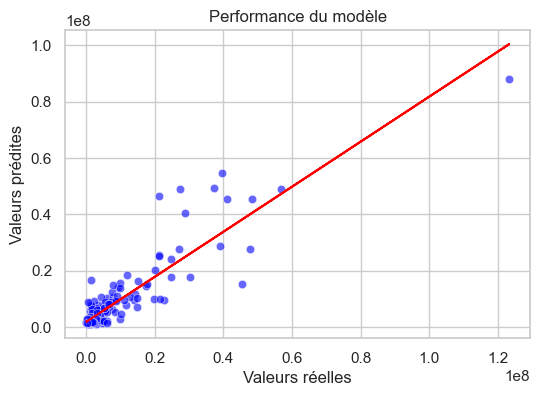

In [180]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_check1_rf, y=y_check1_pred_rf, alpha=0.6, color='blue')
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.title('Performance du modèle')

# Calculons  et tracons la droite de régression
m, b = np.polyfit(y_check1_rf, y_check1_pred_rf, 1)
plt.plot(y_check1_rf, m*y_check1_rf + b, color='red')  # droite de régression
plt.show()

- **Graphe de résidus**

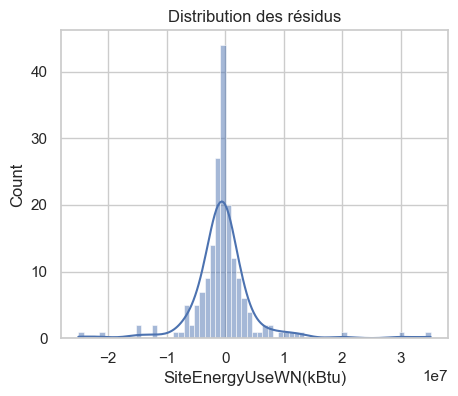

In [181]:
# résidus      
plt.figure(figsize=(5,4))
residus = y_check1_rf - y_check1_pred_rf    
sns.histplot(residus, kde=True)
plt.title("Distribution des résidus")
plt.show()

### <span style="color: brown;">***___TEST_rf___***</span>

- **Prédiction**

In [182]:
# variable prédictive
y_tests1_pred_rf = best_model0.predict(X_tests1_rf)

- **Performance du modèle**

In [183]:
from sklearn import metrics
# Calculons  la RMSE,r2,mae
rf_rmse_tests1 = (mean_squared_error(y_tests1_rf, y_tests1_pred_rf))** 0.5
rf_r2_tests1 = r2_score(y_tests1_rf, y_tests1_pred_rf)
rf_mae_tests1 = mean_absolute_error(y_tests1_rf, y_tests1_pred_rf)

- **Résultats Graphique**

RMSE : 24706012.29
R2 : 0.27
MAE : 5097972.79


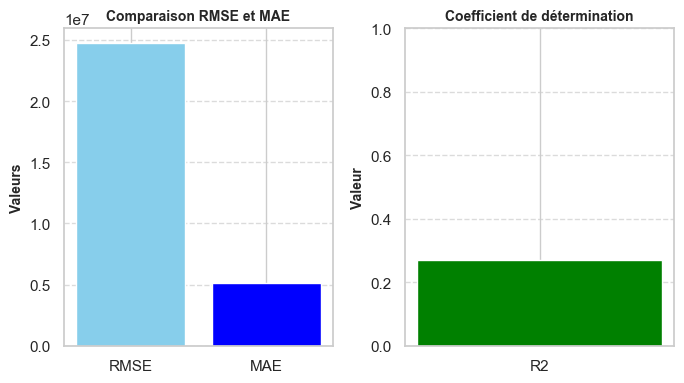

In [184]:
# Affichage des résultats
print('RMSE :', round(rf_rmse_tests1,2))
print('R2 :', round(rf_r2_tests1,2))
print('MAE :', round(rf_mae_tests1,2))

# Visualisation des paramètres RMSE, MAE, R2
fig, axes = plt.subplots(ncols=2, figsize=(7, 4))

# 1. Graphique pour RMSE et MAE
metrics = ['RMSE', 'MAE']
values = [rf_rmse_tests1, rf_mae_tests1]
axes[0].bar(metrics, values, color=['Skyblue', 'blue'])
axes[0].set_title('Comparaison RMSE et MAE', fontsize=10, fontweight = 'bold')
axes[0].set_ylabel('Valeurs', fontsize=10, fontweight = 'bold')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# 2. Graphique pour R2
axes[1].bar(['R2'], [rf_r2_tests1], color='green') # coefficient de détermination commpris entre 0 et 1
axes[1].set_title('Coefficient de détermination', fontsize=10, fontweight = 'bold')
axes[1].set_ylabel('Valeur', fontsize=10, fontweight = 'bold')
axes[1].set_ylim(0, 1)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

- **Droite de regression**

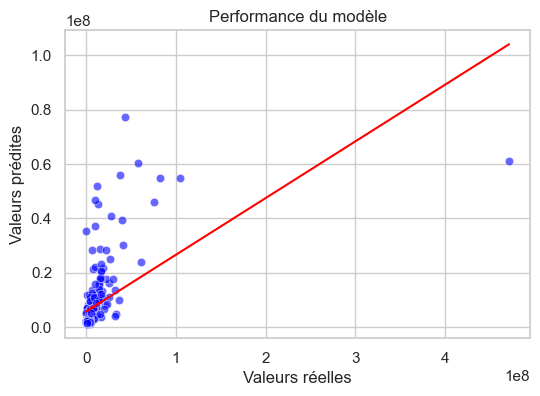

In [185]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_tests1_rf, y=y_tests1_pred_rf, alpha=0.6, color='blue') 
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.title('Performance du modèle')

# Calculons  et tracons la droite de régression
m, b = np.polyfit(y_tests1_rf, y_tests1_pred_rf, 1)
plt.plot(y_tests1_rf, m*y_tests1_rf + b, color='red')  # droite de régression
plt.show()

- **Graphe de résidus**

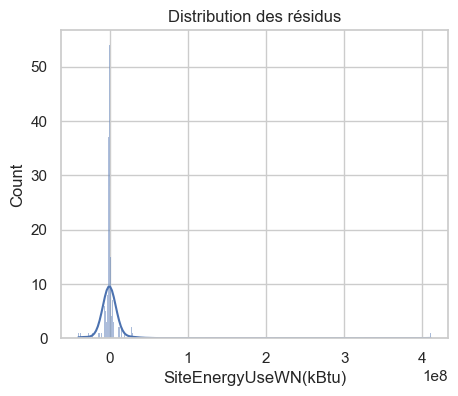

In [186]:
# résidus
plt.figure(figsize=(5,4))
residus = y_tests1_rf - y_tests1_pred_rf    
sns.histplot(residus, kde=True)
plt.title("Distribution des résidus")
plt.show()

#####

##  <span style="color: blue;">***___Modèle Support Vector Machine(SVM)___***</span> 

- **Paramètres du modèle**

In [187]:
# paramètres dun modèle svm
SVM_Parameter = {
                        'C': [0.01,0.1, 1, 10, 100],
                  'epsilon': [0.01, 0.1, 1],
                   'kernel': ['linear', 'rbf', 'poly'],
                    'gamma': ['scale', 'auto']
                }

# Entrainement
X_train1_SVM = X_train
y_train1_SVM = y_train
# validation
X_check1_SVM = X_check
y_check1_SVM = y_check
# test
X_test1_SVM = X_test
y_test1_SVM = y_test

- **Modèle SVM**

In [188]:
# initialisation du modèle
svr = SVR()

- **Entrainement avec le GridsearchCV**

In [189]:
grid_search = GridSearchCV(svr, SVM_Parameter, cv=5, scoring="neg_mean_squared_error")
start_time_SVM1 = timeit.default_timer()
grid_search.fit(X_train1_SVM, y_train1_SVM)
end_time_SVM1 = timeit.default_timer()
elapsed_SVM1 = end_time_SVM1 - start_time_SVM1

- **Meilleurs paramètres**

In [190]:
# Obtenir les meilleurs hyperparamètres et le meilleur modèle
best_param = grid_search.best_params_
print(best_param)
best_model = grid_search.best_estimator_
print(best_model)

{'C': 100, 'epsilon': 0.01, 'gamma': 'scale', 'kernel': 'linear'}
SVR(C=100, epsilon=0.01, kernel='linear')


###  <span style="color: yellow;">***___Validation_SVM___***</span> 

- **Prédiction**

In [191]:
# Prédire les résultats sur l'ensemble de test
y_check1_pred_SVM = best_model.predict(X_check1_SVM)

- **Performance du modèle**

In [192]:
from sklearn import metrics
# Calcul des métriques
SVM_rmse_valid1 = (mean_squared_error(y_check1_SVM , y_check1_pred_SVM))** 0.5
SVM_r2_valid1 = r2_score(y_check1_SVM , y_check1_pred_SVM)
SVM_mae_valid1 = mean_absolute_error(y_check1_SVM , y_check1_pred_SVM)

- **Résultat grafique**

RMSE : 19144875.91
R2 : -0.07
MAE : 6610840.74
time_SVM1 : 20.51


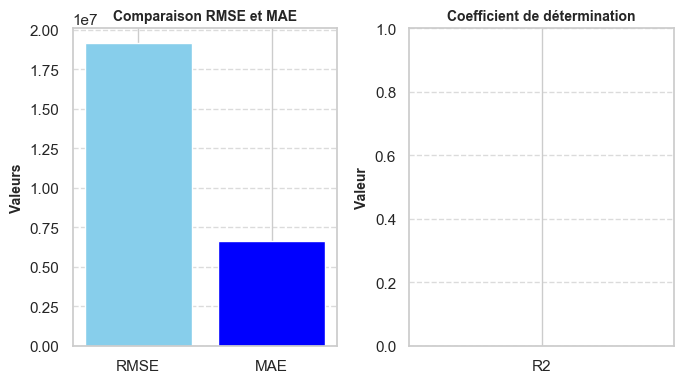

In [193]:
# Affichage des résultats
print('RMSE :', round(SVM_rmse_valid1,2))
print('R2 :', round(SVM_r2_valid1,2))
print('MAE :', round(SVM_mae_valid1,2))
print('time_SVM1 :', round(elapsed_SVM1,2))

# Visualisation des paramètres RMSE, MAE, R2
fig, axes = plt.subplots(ncols=2, figsize=(7, 4))

# 1. Graphique pour RMSE et MAE
metrics = ['RMSE', 'MAE']
values = [SVM_rmse_valid1, SVM_mae_valid1]
axes[0].bar(metrics, values, color=['Skyblue', 'blue'])
axes[0].set_title('Comparaison RMSE et MAE', fontsize=10, fontweight = 'bold')
axes[0].set_ylabel('Valeurs', fontsize=10, fontweight = 'bold')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# 2. Graphique pour R2
axes[1].bar(['R2'], [SVM_r2_valid1], color='green') # coefficient de détermination commpris entre 0 et 1
axes[1].set_title('Coefficient de détermination', fontsize=10, fontweight = 'bold')
axes[1].set_ylabel('Valeur', fontsize=10, fontweight = 'bold')
axes[1].set_ylim(0, 1)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

- **droite de regression**

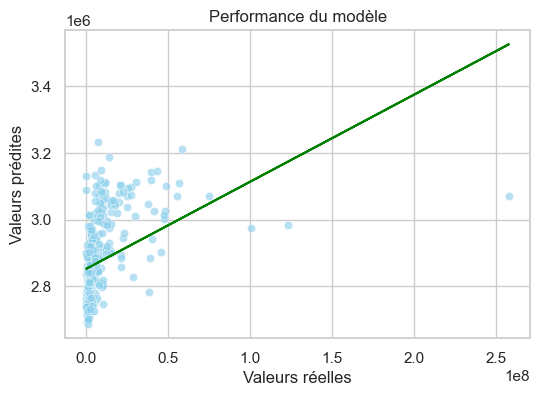

In [194]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_check1_SVM, y=y_check1_pred_SVM, alpha=0.6, color='skyblue')
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.title('Performance du modèle')

# Calculons  et tracons la droite de régression
m, b = np.polyfit(y_check1_SVM, y_check1_pred_SVM, 1)
plt.plot(y_check1_SVM, m*y_check1_SVM + b, color='green')  # droite de régression
plt.show()

- **Résidus**

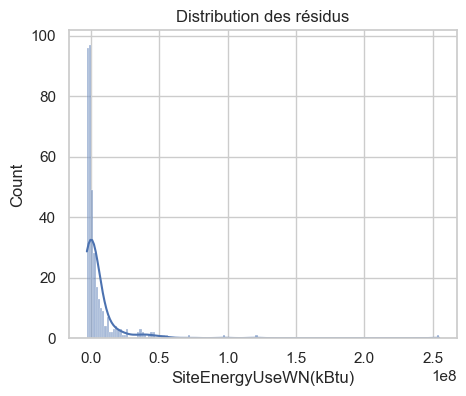

In [195]:
# résidus
plt.figure(figsize=(5,4))
residus = y_check1_SVM - y_check1_pred_SVM    
sns.histplot(residus, kde=True)
plt.title("Distribution des résidus")
plt.show()

##  <span style="color: yellow;">***___Test_SVM___***</span> 

- **Prédiction**

In [196]:
# Prédire les résultats sur l'ensemble de test
y_test1_pred_SVM = best_model.predict(X_test1_SVM)

C:\Users\521169\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


- **Performance du modèle**

In [197]:
from sklearn import metrics
# Calcul des métriques
SVM1_rmse_test1 = (mean_squared_error(y_test1_SVM, y_test1_pred_SVM))** 0.5
SVM1_r2_test1 = r2_score(y_test1_SVM, y_test1_pred_SVM)
SVM1_mae_test1 = mean_absolute_error(y_test1_SVM, y_test1_pred_SVM)

- **Résultat graphique**

RMSE : 29392646.43
R2 : -0.03
MAE : 6937296.67


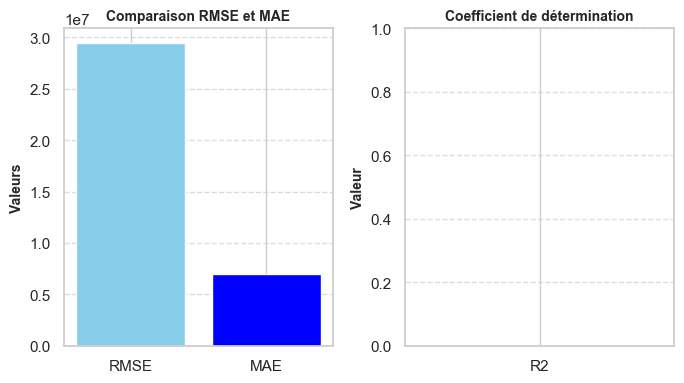

In [198]:
# Affichage des résultats
print('RMSE :', round(SVM1_rmse_test1,2))
print('R2 :', round(SVM1_r2_test1,2))
print('MAE :', round(SVM1_mae_test1,2))

# Visualisation des paramètres RMSE, MAE, R2
fig, axes = plt.subplots(ncols=2, figsize=(7, 4))

# 1. Graphique pour RMSE et MAE
metrics = ['RMSE', 'MAE']
values = [SVM1_rmse_test1, SVM1_mae_test1]
axes[0].bar(metrics, values, color=['Skyblue', 'blue'])
axes[0].set_title('Comparaison RMSE et MAE', fontsize=10, fontweight = 'bold')
axes[0].set_ylabel('Valeurs', fontsize=10, fontweight = 'bold')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# 2. Graphique pour R2
axes[1].bar(['R2'], [SVM1_r2_test1], color='green') # coefficient de détermination commpris entre 0 et 1
axes[1].set_title('Coefficient de détermination', fontsize=10, fontweight = 'bold')
axes[1].set_ylabel('Valeur', fontsize=10, fontweight = 'bold')
axes[1].set_ylim(0, 1)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

- **droite de regression**

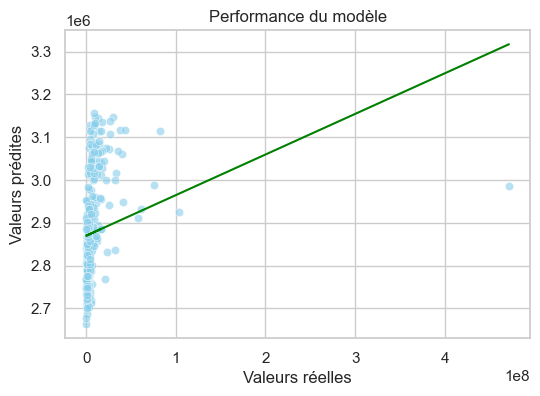

In [199]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test1_SVM, y=y_test1_pred_SVM, alpha=0.6, color='skyblue')
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.title('Performance du modèle')

# Calculons  et tracons la droite de régression
m, b = np.polyfit(y_test1_SVM, y_test1_pred_SVM, 1)
plt.plot(y_test1_SVM, m*y_test1_SVM + b, color='green') # droite de régression
plt.show()

- **Graphe de résidus**

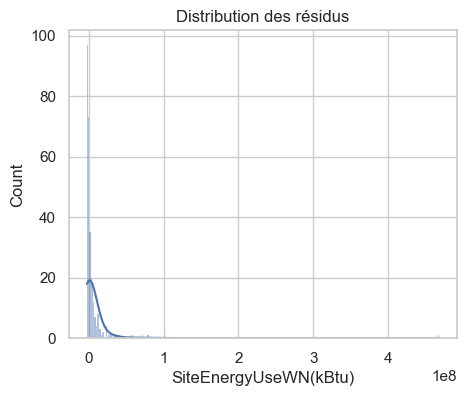

In [200]:
# résidus
plt.figure(figsize=(5,4))
residus = y_test1_SVM - y_test1_pred_SVM 
sns.histplot(residus, kde=True)
plt.title("Distribution des résidus")
plt.show()

### 3- Visualisation des graphes de performances

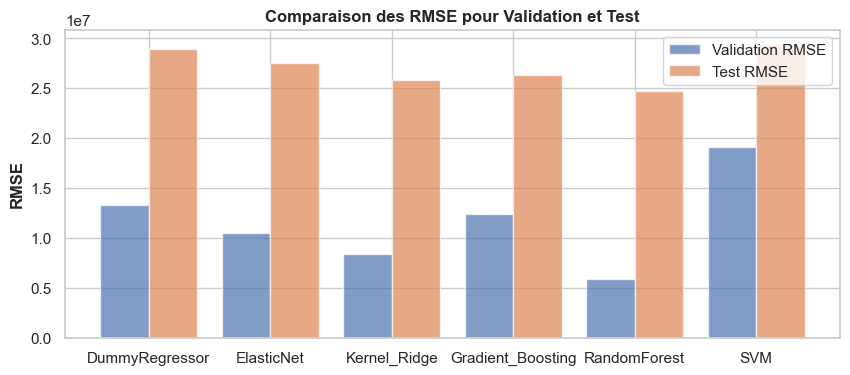

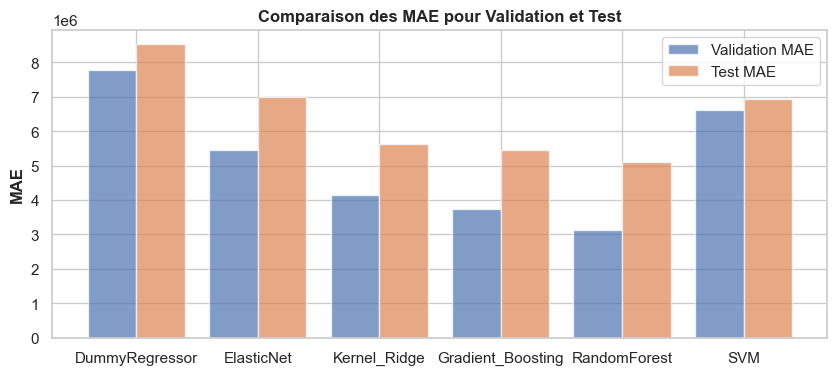

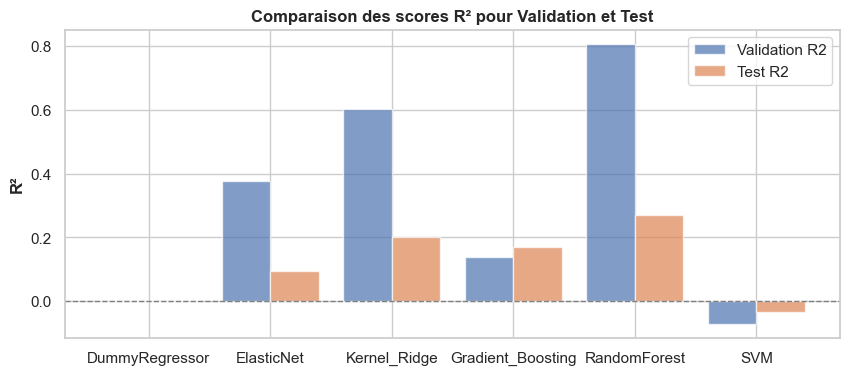

In [201]:
# visualisation des différents graphique de performances
# Modèles
models = ["DummyRegressor","ElasticNet", "Kernel_Ridge", "Gradient_Boosting", "RandomForest","SVM"]

# Données pour validation
validation_rmse = [dummy_rmse_valid1, elasticNet_rmse_valide1, kernelridge_rmse_valide1, GB_rmse_valide1, rf_rmse_valide1, SVM_rmse_valid1]
validation_mae = [dummy_mae_valid1, elasticNet_mae_valide1, kernelridge_mae_valide1, GB_mae_valide1, rf_mae_valide1, SVM_mae_valid1]
validation_r2 = [dummy_r2_valid1, elasticNet_r2_valide1, kernelridge_r2_valide1, GB_r2_valide1, rf_r2_valide1, SVM_r2_valid1]

# Données pour test
test_rmse = [dummy_rmse_test1, elasticNet_rmse_test1, kernelridge_rmse_tests1, GB_rmse_tests1, rf_rmse_tests1, SVM1_rmse_test1]
test_mae = [dummy_mae_test1, elasticNet_mae_test1, kernelridge_mae_tests1, GB_mae_tests1, rf_mae_tests1, SVM1_mae_test1]
test_r2 = [dummy_r2_test1, elasticNet_r2_test1, kernelridge_r2_tests1, GB_r2_tests1, rf_r2_tests1, SVM1_r2_test1]

# Graphiques pour RMSE et MAE 
x = np.arange(len(models))  # Positions sur l'axe x  

plt.figure(figsize=(10, 4))

# RMSE
plt.bar(x - 0.2, validation_rmse, width=0.4, label='Validation RMSE', alpha=0.7)
plt.bar(x + 0.2, test_rmse, width=0.4, label='Test RMSE', alpha=0.7)
plt.xticks(x, models)
plt.ylabel('RMSE', fontweight="bold")
plt.title('Comparaison des RMSE pour Validation et Test', fontweight="bold")
plt.legend()
plt.show()

# MAE
plt.figure(figsize=(10, 4))
plt.bar(x - 0.2, validation_mae, width=0.4, label='Validation MAE', alpha=0.7)
plt.bar(x + 0.2, test_mae, width=0.4, label='Test MAE', alpha=0.7)
plt.xticks(x, models)
plt.ylabel('MAE', fontweight="bold")
plt.title('Comparaison des MAE pour Validation et Test', fontweight="bold")
plt.legend()
plt.show()

# Graphique pour R2
plt.figure(figsize=(10, 4))
plt.bar(x - 0.2, validation_r2, width=0.4, label='Validation R2', alpha=0.7)
plt.bar(x + 0.2, test_r2, width=0.4, label='Test R2', alpha=0.7)
plt.xticks(x, models)
plt.ylabel('R²', fontweight="bold")
plt.title('Comparaison des scores R² pour Validation et Test', fontweight="bold")
plt.axhline(0, color='gray', linestyle='--', linewidth=1)  # Ligne pour R2=0
plt.legend()
plt.show()

  ###  4- <span style="color: blue;">***___**Visualisation du temps d'exécution des différents modèles**___***</span>

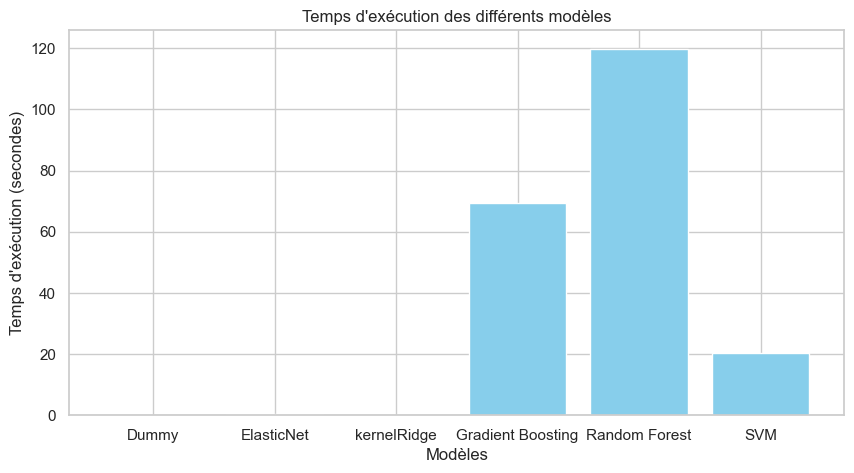

In [202]:
# Liste  des modèles
models = ['Dummy', 'ElasticNet', 'kernelRidge', 'Gradient Boosting','Random Forest', 'SVM']

# Temps d'exécution correspondants à chaque modèle 
execution_times = [elapsed_dummy1, elapsed_elasticNet1, elapsed_kernelridge1, elapsed_GB1, elapsed_rf1, elapsed_SVM1]

# Création du graphique à barres
plt.figure(figsize=(10, 5))
plt.bar(models, execution_times, color='skyblue')

# Ajouter des titres et des étiquettes
plt.title('Temps d\'exécution des différents modèles')
plt.xlabel('Modèles')
plt.ylabel('Temps d\'exécution (secondes)')
plt.show()

#####

## **3- Choix de features importants**

In [203]:
# Le meilheure modèle choisi
best_model0 # randomforest

RandomForestRegressor(max_depth=10, min_samples_leaf=2, n_estimators=150)

In [204]:
# calcul de l'importance de chaque variable dans le modèle Random Forest
importance = best_model0.feature_importances_

In [205]:
# Récupérer les noms de chaque colonne (feature) 
feature_names  =  X1.columns
feature_names

Index(['Longitude', 'Latitude', 'LargestPropertyUseTypeGFA',
       'GFA_Building_Rate', 'GFA_Parking_Rate', 'SumUseType',
       'Building_Age_label_encoded', 'NumberofFloors_label_encoded',
       'NumberofBuildings_label_encoded', 'Neighborhood_BALLARD',
       'Neighborhood_Ballard', 'Neighborhood_CENTRAL', 'Neighborhood_Central',
       'Neighborhood_DELRIDGE', 'Neighborhood_DELRIDGE NEIGHBORHOODS',
       'Neighborhood_DOWNTOWN', 'Neighborhood_Delridge', 'Neighborhood_EAST',
       'Neighborhood_GREATER DUWAMISH', 'Neighborhood_LAKE UNION',
       'Neighborhood_MAGNOLIA / QUEEN ANNE', 'Neighborhood_NORTH',
       'Neighborhood_NORTHEAST', 'Neighborhood_NORTHWEST',
       'Neighborhood_North', 'Neighborhood_Northwest',
       'Neighborhood_SOUTHEAST', 'Neighborhood_SOUTHWEST',
       'PrimaryPropertyType_Distribution Center',
       'PrimaryPropertyType_Hospital', 'PrimaryPropertyType_Hotel',
       'PrimaryPropertyType_K-12 School', 'PrimaryPropertyType_Laboratory',
       'Prima

In [206]:
# Calcule de l'écart-type des importances des différentes variables (features) du modèle
std = np.std([tree.feature_importances_ for tree in best_model0.estimators_], axis=0)
std

array([5.38035911e-02, 3.60339875e-02, 1.72628200e-01, 6.00597836e-03,
       3.65485770e-03, 1.91297372e-02, 2.71084303e-02, 3.74074865e-02,
       1.02579391e-02, 1.01351248e-03, 0.00000000e+00, 9.10275276e-05,
       2.31356554e-05, 1.02595948e-04, 0.00000000e+00, 1.88338055e-02,
       1.28797751e-03, 7.61773138e-02, 1.22569625e-03, 3.16878955e-03,
       4.21736983e-04, 1.12507261e-04, 4.30540337e-03, 1.21251260e-04,
       0.00000000e+00, 0.00000000e+00, 1.82853851e-04, 3.20243942e-05,
       1.54004375e-04, 2.18007998e-01, 3.27880953e-03, 4.41483092e-05,
       4.96570516e-03, 4.72264455e-03, 0.00000000e+00, 8.06403213e-04,
       1.30140674e-02, 1.07814726e-02, 0.00000000e+00, 9.72807851e-05,
       2.46843575e-04, 3.14740048e-04, 2.84197947e-04, 4.05187971e-04,
       3.06259263e-04, 1.75614593e-03, 7.76633669e-04, 1.59096391e-03,
       1.94708974e-05, 7.39515946e-03, 4.84931149e-03, 1.35561233e-03,
       0.00000000e+00, 2.37056201e-08])

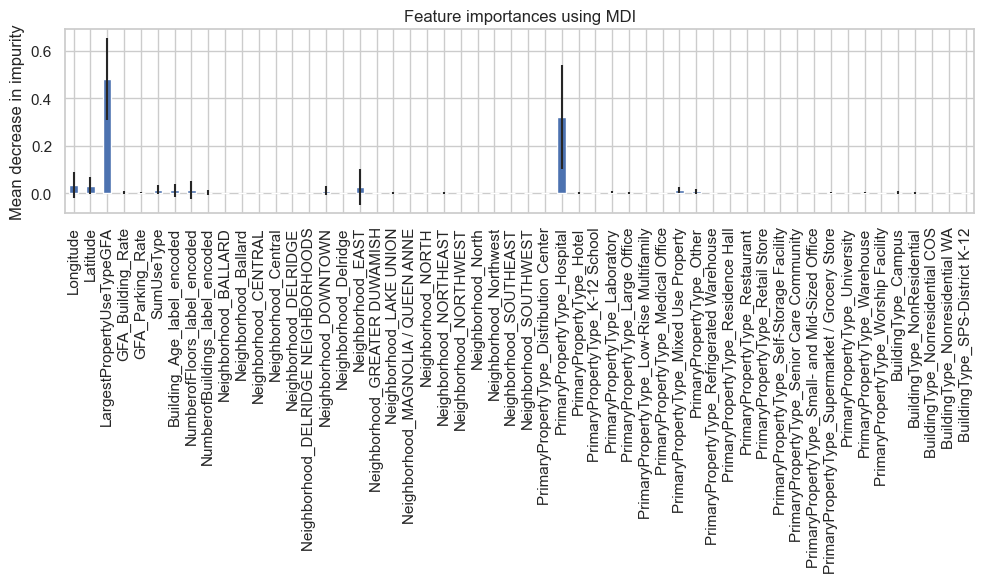

In [207]:
# Créer une série pandas contenant les importances de chaque caractéristique
forest_importances = pd.Series(importance, index=feature_names)

fig, ax = plt.subplots(figsize=(10, 6)) 

# Tracer le graphique des importances
forest_importances.plot.bar(yerr=std, ax=ax)

# Ajouter un titre et des labels
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")

# Ajuster la mise en page
fig.tight_layout()

- **Best feature**

In [208]:
# la contribution de chaque featue à l'ensemble des prédictions du modèle sur l'ensemble de données de test
explainer = shap.TreeExplainer(best_model0)
shap_values = explainer.shap_values(X_tests1)

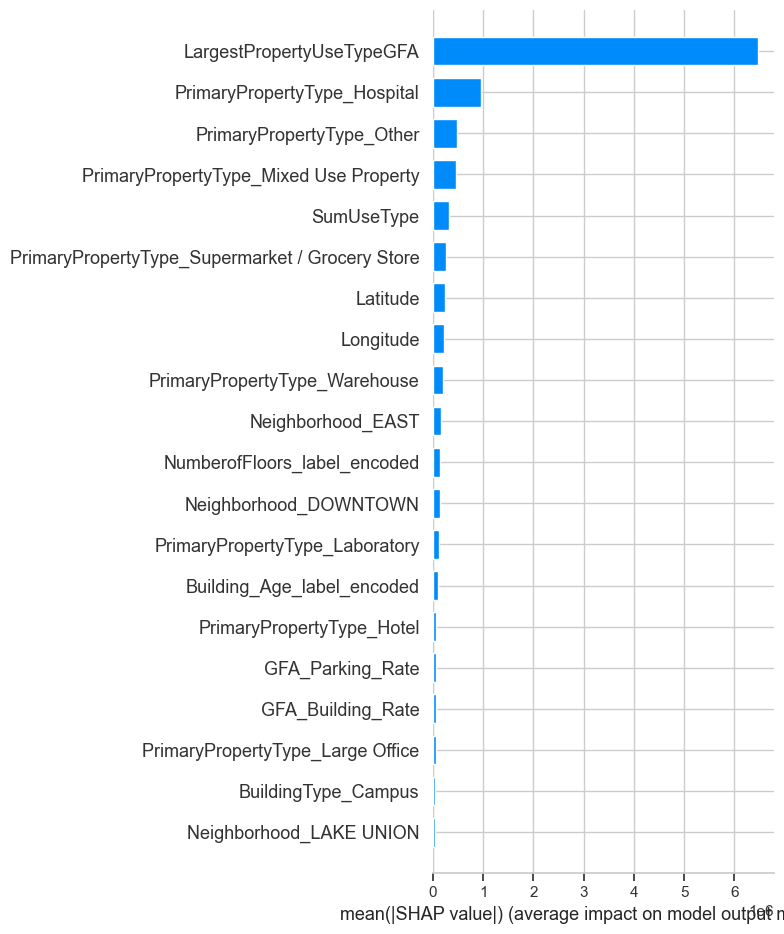

In [209]:
# Vérifiez que X_test est un DataFrame avec des noms de colonnes
X_tests1 = pd.DataFrame(X_tests1, columns=feature_names)

# Affichez le résumé SHAP avec noms de caractéristiques
shap.summary_plot(shap_values, X_tests1, plot_type="bar")

# Conclusion

Les analyses réalisées sur le jeu de données, tout en conservant les mêmes bâtiments et leurs distributions, permettent d'éviter tout biais dans les résultats, que la variable ENERGYSTARScore soit prise en compte ou non.

1- Lors de l'entraînement des modèles avec la variable ENERGYSTARScore, les résultats montrent que la plupart des modèles sont performants. Toutefois, les modèles random forest et Kernel Ridge se distinguent comme étant les plus adaptés pour prédire la consommation énergétique et les émissions de carbone des bâtiments(à partir des variables importants). En termes de temps d'exécution, le modèle Kernel Ridge s'avère le plus optimal.Mais en terme performance brute c'est le random forest

2- Pour le second cas, sans la variable ENERGYSTARScore, seul le modèle random forest se démarque largement en termes de performance.

3- Les variables importantes identifiées sont identiques dans les deux scénarios.